In [1]:
require(mgcv)
require(itsadug)
require(readr)
require(dplyr)
require(ggplot2)
require(showtext)
require(RColorBrewer)
showtext_auto()

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.8-35. For overview type 'help("mgcv-package")'.

Loading required package: itsadug

Loading required package: plotfunctions

Loaded package itsadug 2.4 (see 'help("itsadug")' ).

Loading required package: readr

Loading required package: dplyr


Attaching package: 'dplyr'


The following object is masked from 'package:nlme':

    collapse


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2


Attaching package: 'ggplot2'


The following object is masked from 'package:plotfunctions':

    alpha


Loading required package: showtext

Loading required package: sysfonts

Loading required package: showtextdb

Loading required package: RColorBrewer



In [2]:
popt = function(w,h,r){
    options(repr.plot.width=w, repr.plot.height=h, repr.plot.res=r)
}

In [3]:
data = read_csv("../../data/casper/cadet_JanMay.csv")


-- Column specification ------------------------------------------------------------------------------------
cols(
  opid = col_character(),
  year = col_double(),
  woy = col_double(),
  ts = col_double(),
  source = col_character(),
  entity = col_character(),
  category = col_character(),
  attribute = col_character(),
  rating = col_double(),
  text = col_character()
)




In [4]:
names(data)

[1] "opid"      "year"      "woy"       "ts"        "source"    "entity"   
 [7] "category"  "attribute" "rating"    "text"

In [5]:
pol_data = data[(data$rating!=0) & (data$year==2021) & (substring(data$entity, 0, 1)!="無"),2:9]
pol_data$rating = (pol_data$rating+1)/2
pol_data$entity = factor(pol_data$entity)
pol_data$source = factor(pol_data$source)
pol_data$category = factor(pol_data$category)
nrow(pol_data)

[1] 13434

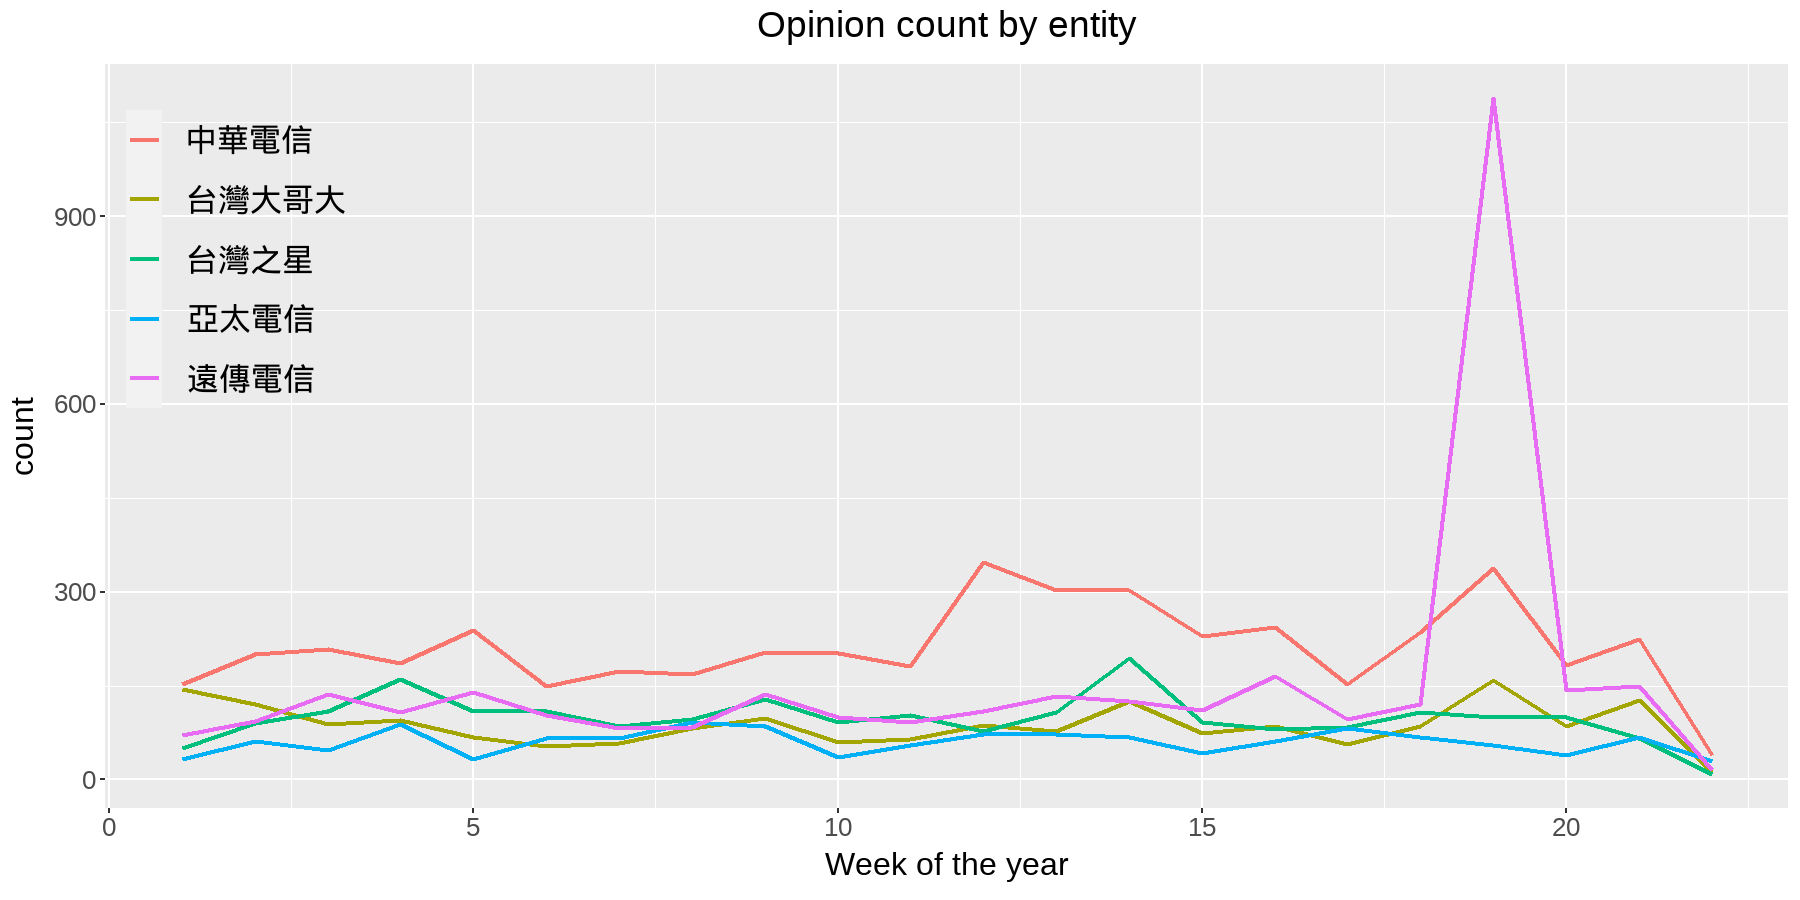

In [6]:
popt(12,6,150)
ggplot(pol_data, aes(x=woy, color=entity)) + 
geom_line(stat="count", lwd=1) + 
labs(title="Opinion count by entity", x="Week of the year", color="電信業者") + 
theme(plot.title=element_text(size=28, hjust=0.5),
      text = element_text(size=24),
      legend.text=element_text(size=24), legend.position=c(.0,1), 
      legend.title=element_blank(),
      legend.margin=margin(10,10,10,10), 
      legend.justification=c("left", "top"),
      legend.background=element_rect(fill="transparent"))

In [8]:
unique(pol_data$source)

[1] BabyHome 寶貝家庭親子網 Dcard                   facebook粉絲團         
 [4] Google Play App 評價    mobile01                Plurk搜尋              
 [7] Ptt                     伊莉討論區              SOGO論壇               
[10] ePrice比價王            iTunes App 評價         Line Today             
[13] PCDVD                   Sogi手機王              TWitter搜尋            
[16] 卡提諾王國              Youtube頻道             Android-台灣中文網     
[19] 巴哈姆特哈拉區          Meteor                  媽咪拜MamiBuy          
[22] facebook社團或個人      捷克論壇                鹿talk社               
[25] 信誼奇蜜親子網          嘰咕 Park               Luckydog               
[28] MyAV                   
28 Levels: Android-台灣中文網 BabyHome 寶貝家庭親子網 Dcard ... 嘰咕 Park

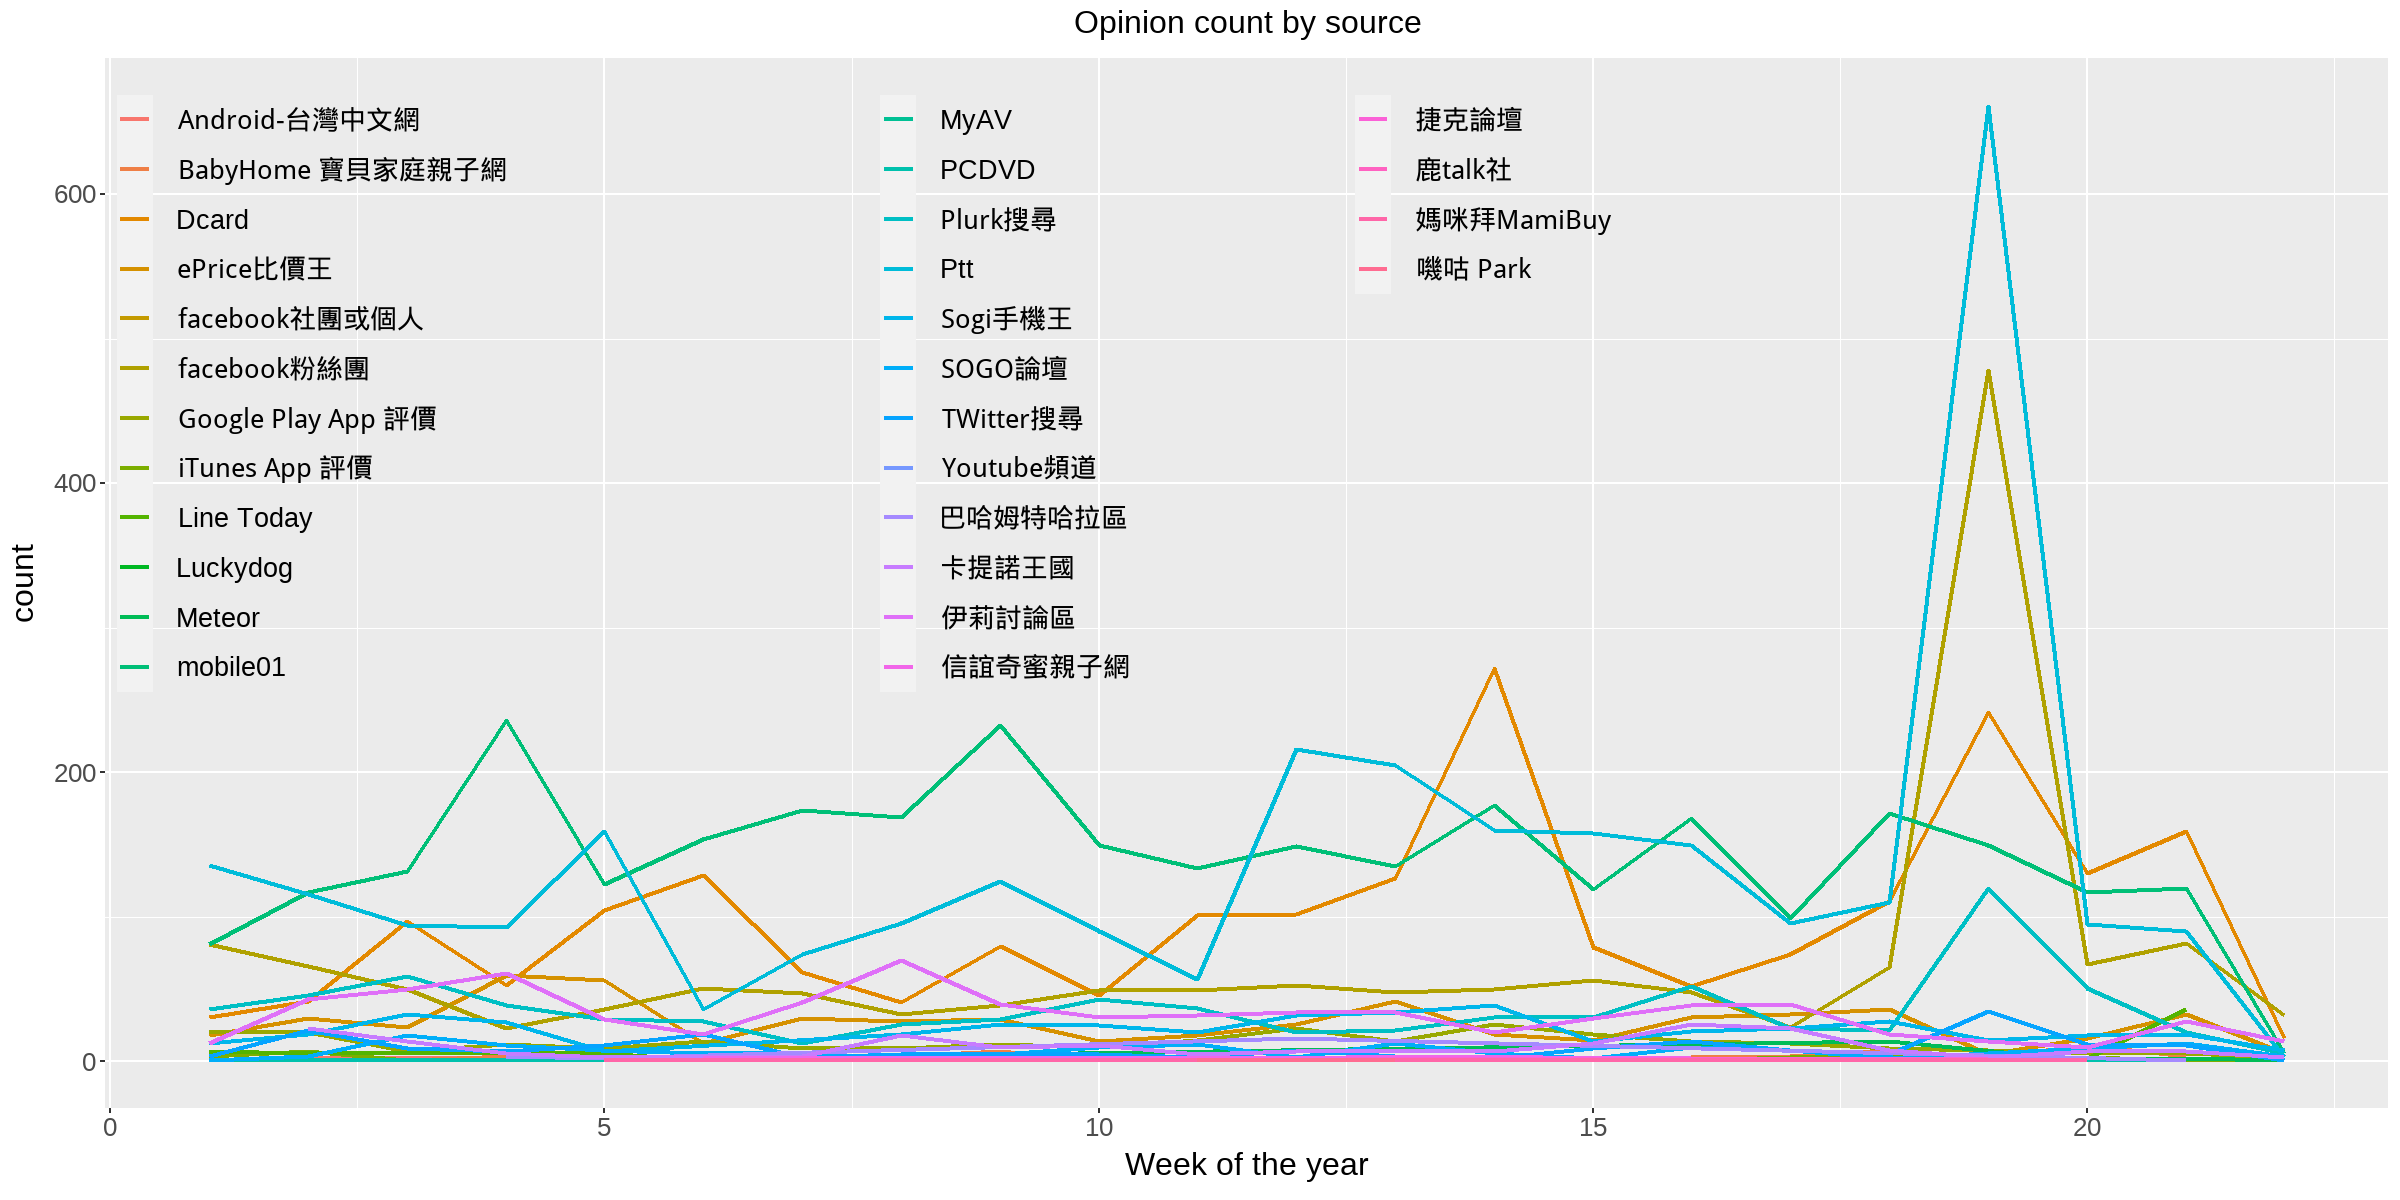

In [9]:
popt(16,8,150)
ggplot(pol_data, aes(x=woy, color=source)) + 
geom_line(stat="count", lwd=1) + 
labs(title="Opinion count by source", x="Week of the year") + 
scale_color_discrete(guide=guide_legend(nrow=12)) + 
theme(plot.title=element_text(size=24, hjust=0.5),
      text=element_text(size=24),
      legend.title=element_blank(),            
      legend.text=element_text(size=20), legend.position=c(.0,1),       
      legend.justification=c("left", "top"),
      legend.background=element_rect(fill="transparent"))

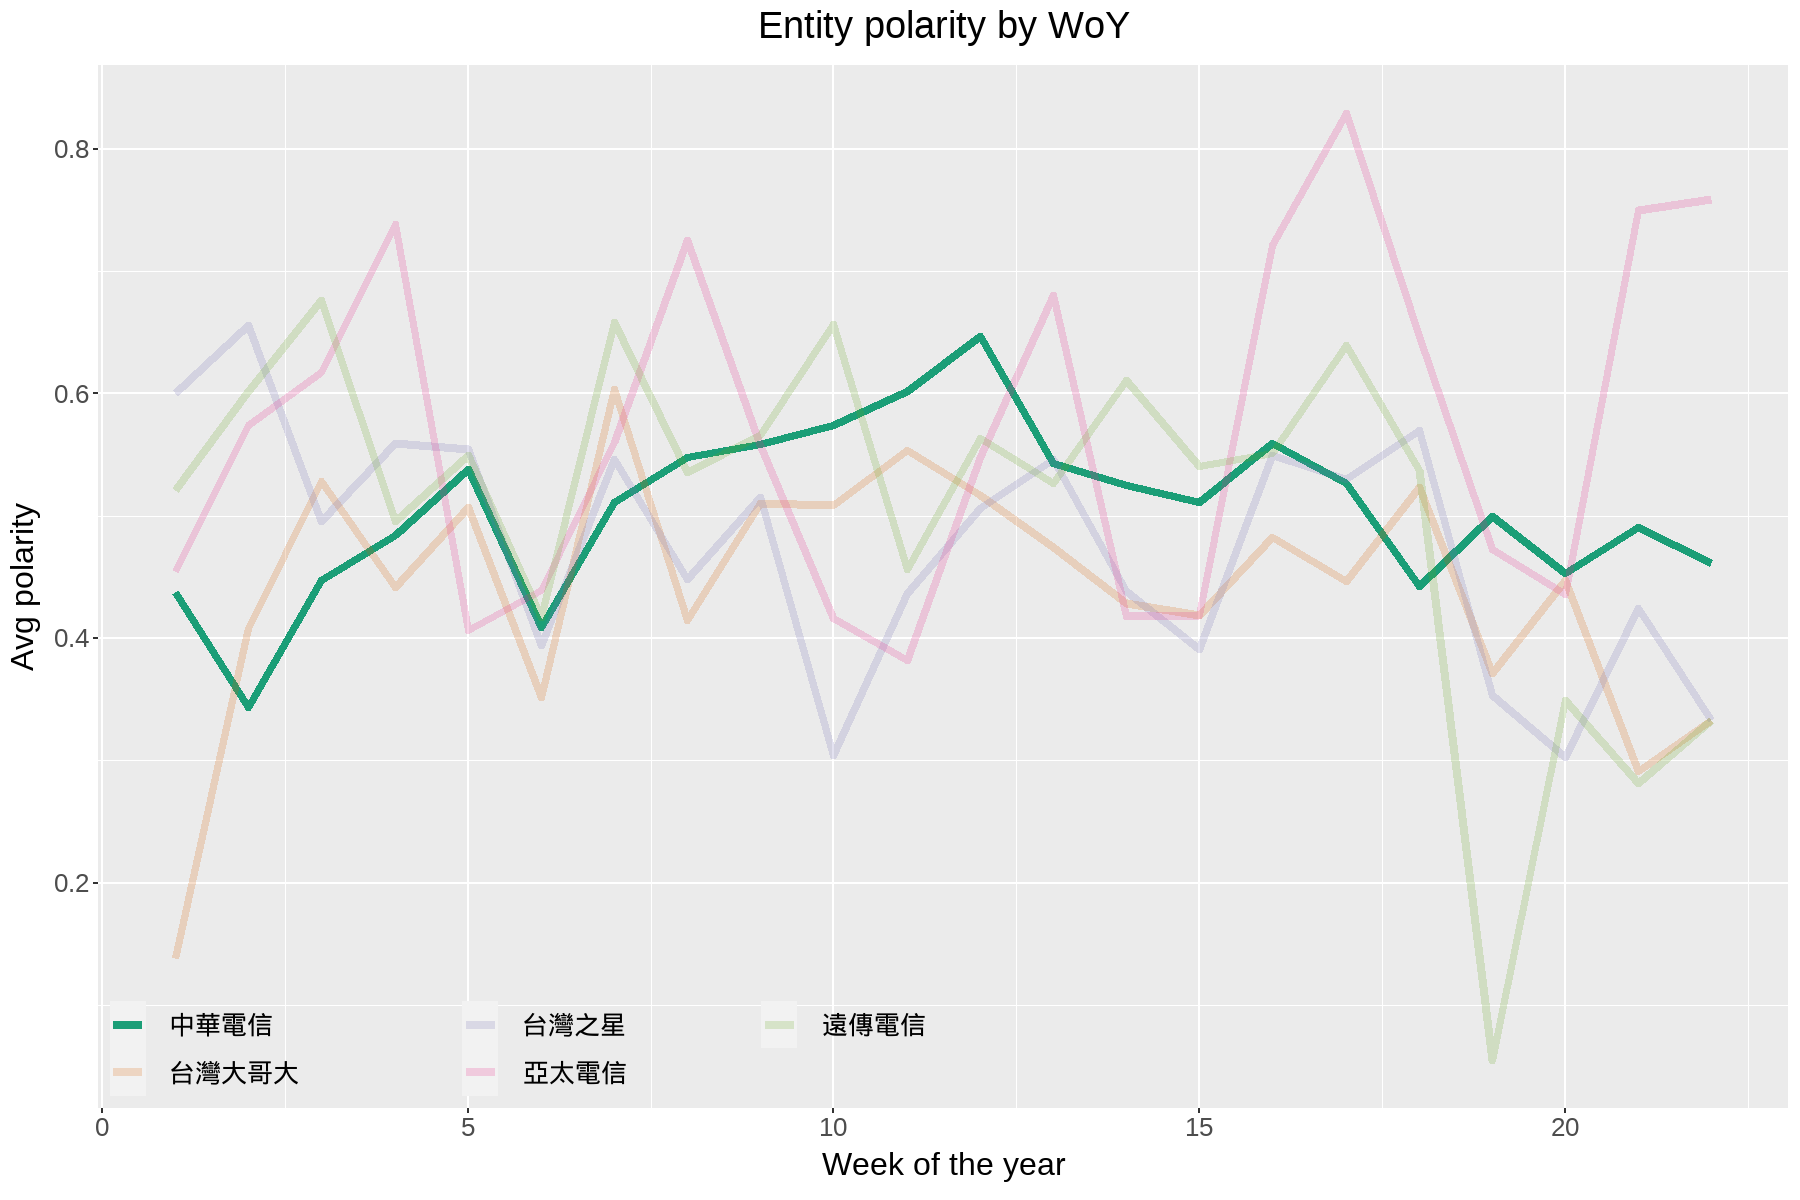

In [10]:
popt(12,8,150)
ent_pal = function() {
    function(n){
        avals = rep(0.2, n)
        avals[1] = 1
        return(alpha(brewer.pal(n, 'Dark2'), avals))
    }
}
ggplot(data = pol_data %>% 
               group_by(entity, woy) %>% 
               summarise(mean=mean(rating), .groups="drop"),
      aes(x=woy, y=mean, color=entity)) + 
geom_line(lwd=2) + 
labs(y="Avg polarity", x="Week of the year", title="Entity polarity by WoY") + 
scale_color_discrete(palette=ent_pal(), guide=guide_legend(nrow=2)) + 
theme(text=element_text(size=24),
    plot.title=element_text(hjust=0.5),
    legend.position=c(0, 0), 
    legend.justification=c("left", "bottom"),
    legend.background=element_rect(fill="transparent"),
    legend.title=element_blank())

In [11]:
cht_data = pol_data %>% filter(entity=="中華電信" & (category %in% c("通訊品質", "資費方案", "加值服務")))
cht_data$source = factor(cht_data$source)
cht_data$category = relevel(factor(cht_data$category), "通訊品質")

In [21]:
nrow(data)

[1] 104685

In [20]:
nrow(cht_data)

[1] 3333

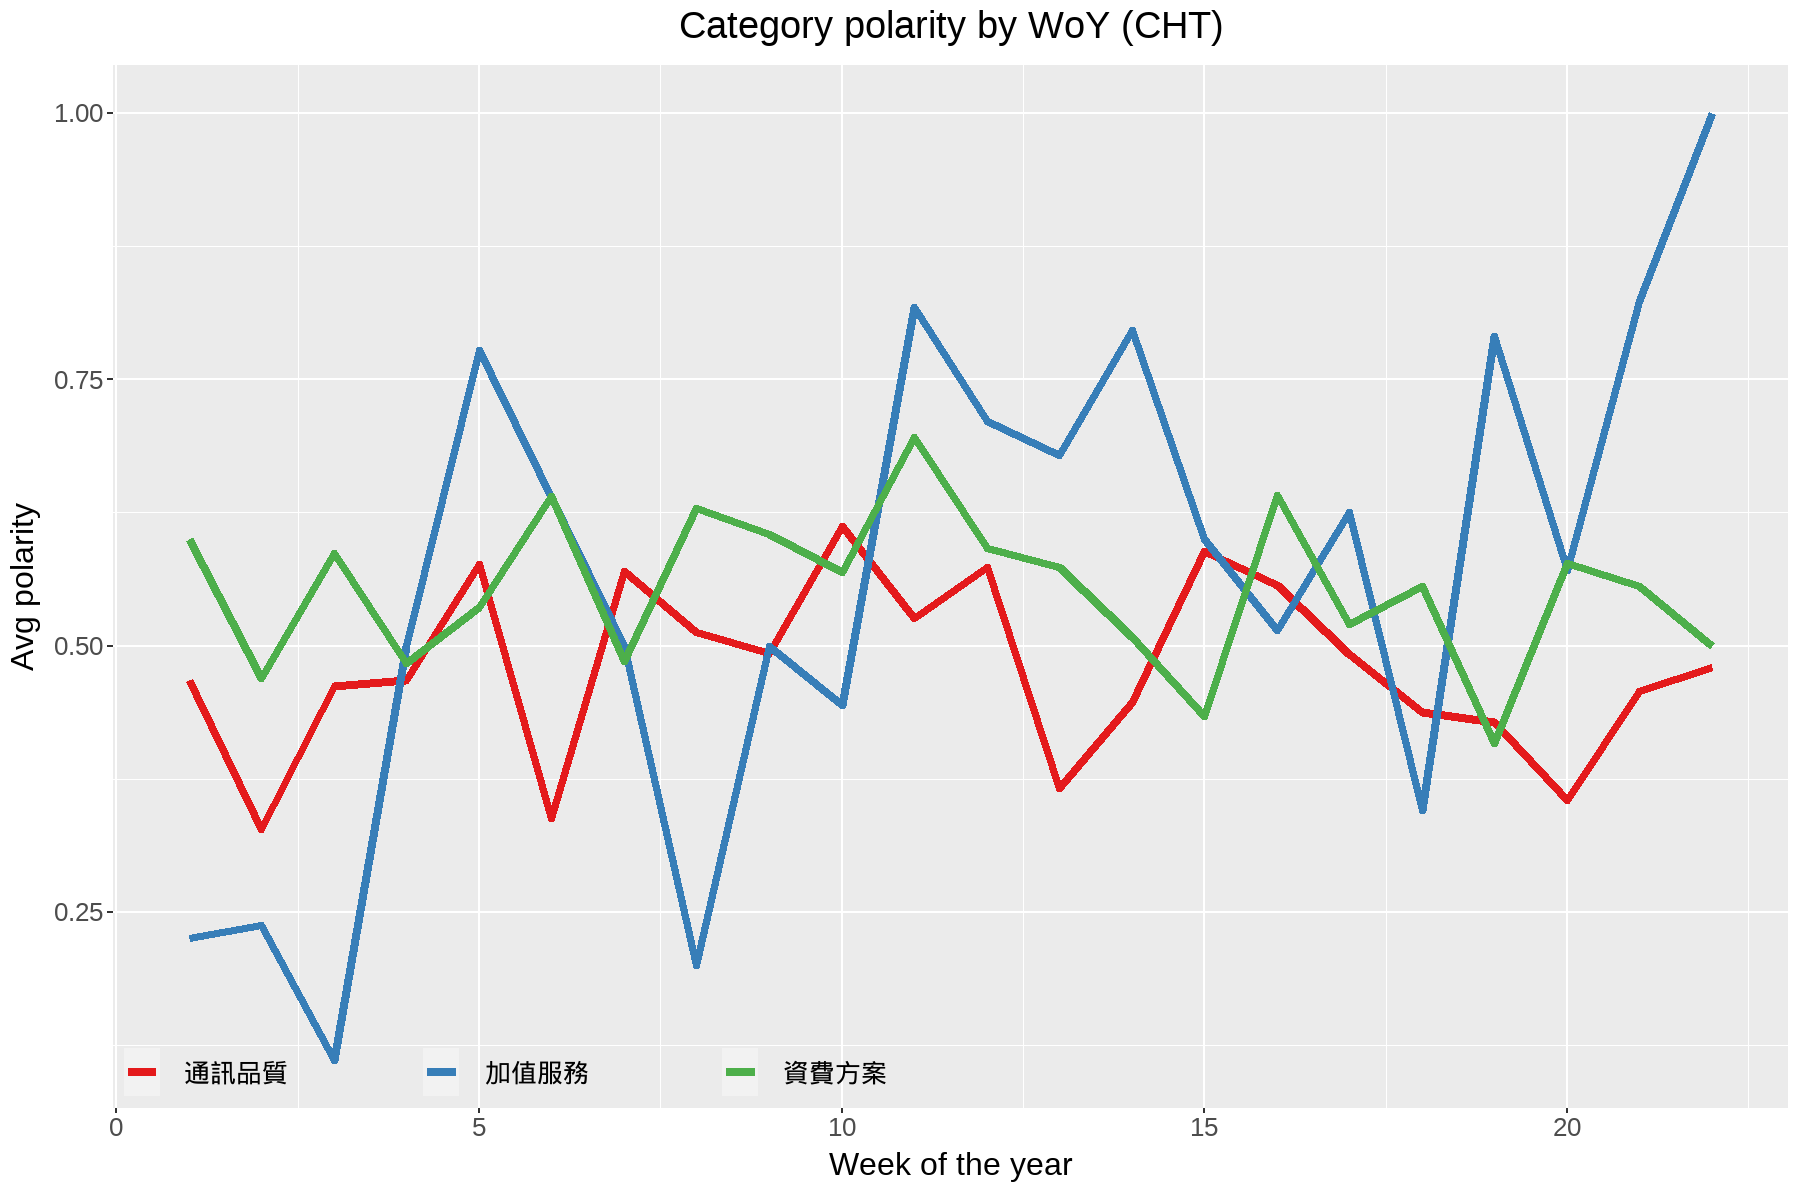

In [12]:
popt(12,8,150)
ggplot(data = cht_data %>% 
               group_by(category, woy) %>% 
               summarise(mean=mean(rating), .groups="drop"),
      aes(x=woy, y=mean, color=category)) + 
geom_line(lwd=2) + 
labs(y="Avg polarity", x="Week of the year", title="Category polarity by WoY (CHT)") + 
scale_color_brewer(palette="Set1", guide=guide_legend(nrow=1)) + 
theme(text=element_text(size=24),
    plot.title=element_text(hjust=0.5),
    legend.position=c(0, 0), 
    legend.justification=c("left", "bottom"),
    legend.background=element_rect(fill="transparent"),
    legend.title=element_blank())

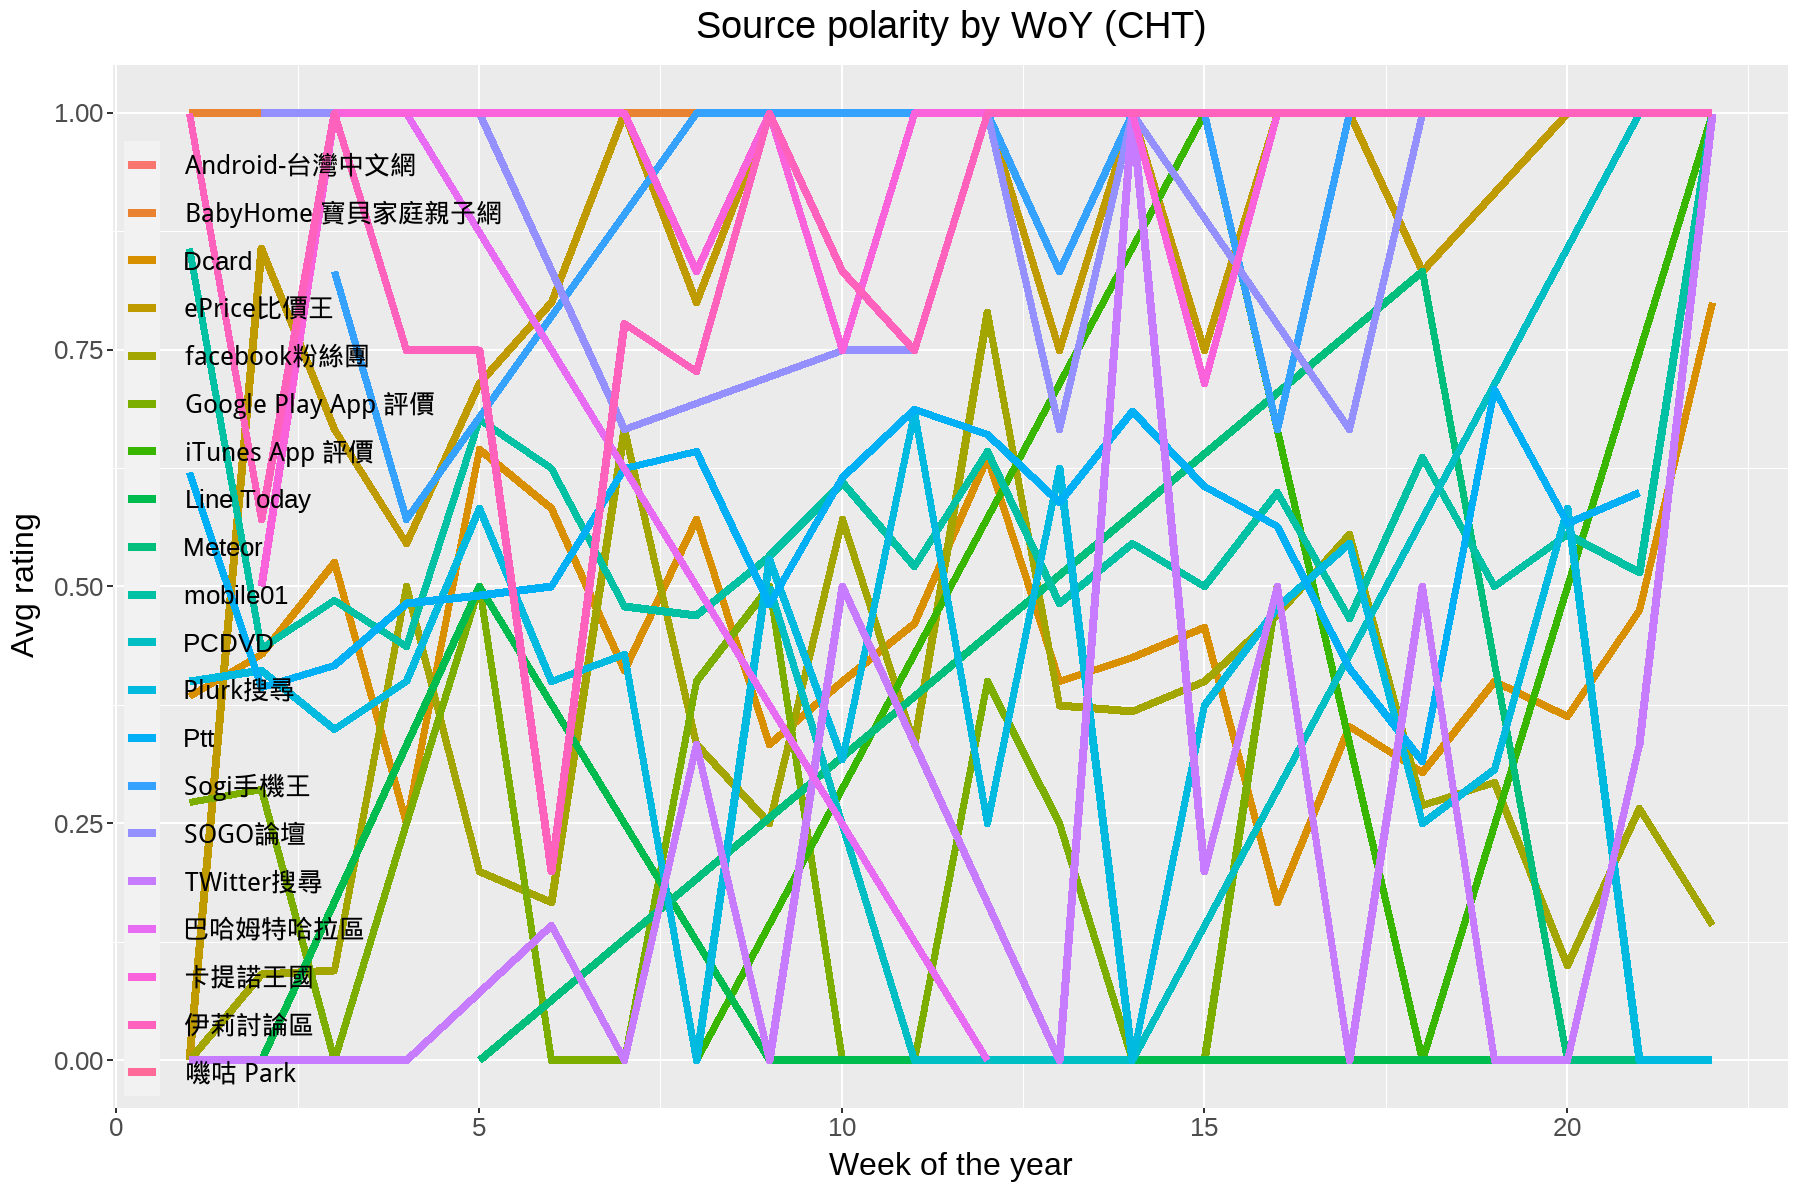

In [13]:
popt(12,8,150)
ggplot(data = cht_data %>%
               group_by(source, woy) %>% 
               summarise(mean=mean(rating), .groups="drop"),
      aes(x=woy, y=mean, color=source)) + 
geom_line(lwd=2) + 
scale_y_continuous(limits=c(0,1)) +
labs(y="Avg rating", x="Week of the year", title="Source polarity by WoY (CHT)") + 
theme(text=element_text(size=24),
    plot.title=element_text(hjust=0.5),
    legend.position=c(0, 0), 
    legend.justification=c("left", "bottom"),
    legend.background=element_rect(fill="transparent"),
    legend.title=element_blank())

In [14]:
m0 = bam(rating~s(ts) + s(source, bs='re'), data=cht_data, family="binomial", method="ML")

In [15]:
summary(m0)


Family: binomial 
Link function: logit 

Formula:
rating ~ s(ts) + s(source, bs = "re")

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   0.3138     0.3067   1.023    0.306

Approximate significance of smooth terms:
             edf Ref.df Chi.sq p-value    
s(ts)      2.964  3.693   19.8 0.00041 ***
s(source) 14.996 19.000  265.4 < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.101   Deviance explained = 8.33%
-ML = 4734.9  Scale est. = 1         n = 3333

In [16]:
m1 = bam(rating~category+s(ts, by=category)+s(source, bs='re'), data=cht_data, family="binomial", method="ML")

In [17]:
summary(m1)


Family: binomial 
Link function: logit 

Formula:
rating ~ category + s(ts, by = category) + s(source, bs = "re")

Parametric coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.17702    0.32288   0.548 0.583526    
category加值服務  0.44674    0.12436   3.592 0.000328 ***
category資費方案  0.20988    0.08614   2.436 0.014832 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                          edf Ref.df  Chi.sq p-value    
s(ts):category通訊品質  1.001  1.001   0.170   0.681    
s(ts):category加值服務  6.166  7.257  49.578  <2e-16 ***
s(ts):category資費方案  1.001  1.001   1.039   0.308    
s(source)              15.159 19.000 250.961  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.119   Deviance explained = 9.85%
-ML = 4741.8  Scale est. = 1         n = 3333

In [18]:
ts_ticks = cht_data %>% group_by(woy) %>% summarise(ts=min(ts))

Summary:
	* category : factor; set to the value(s): 加值服務, 通訊品質, 資費方案. 
	* ts : numeric predictor; with 30 values ranging from 286189.000000 to 13075922.000000. 
	* source : factor; set to the value(s): Ptt. (Might be canceled as random effect, check below.) 
	* NOTE : The following random effects columns are canceled: s(source)
 


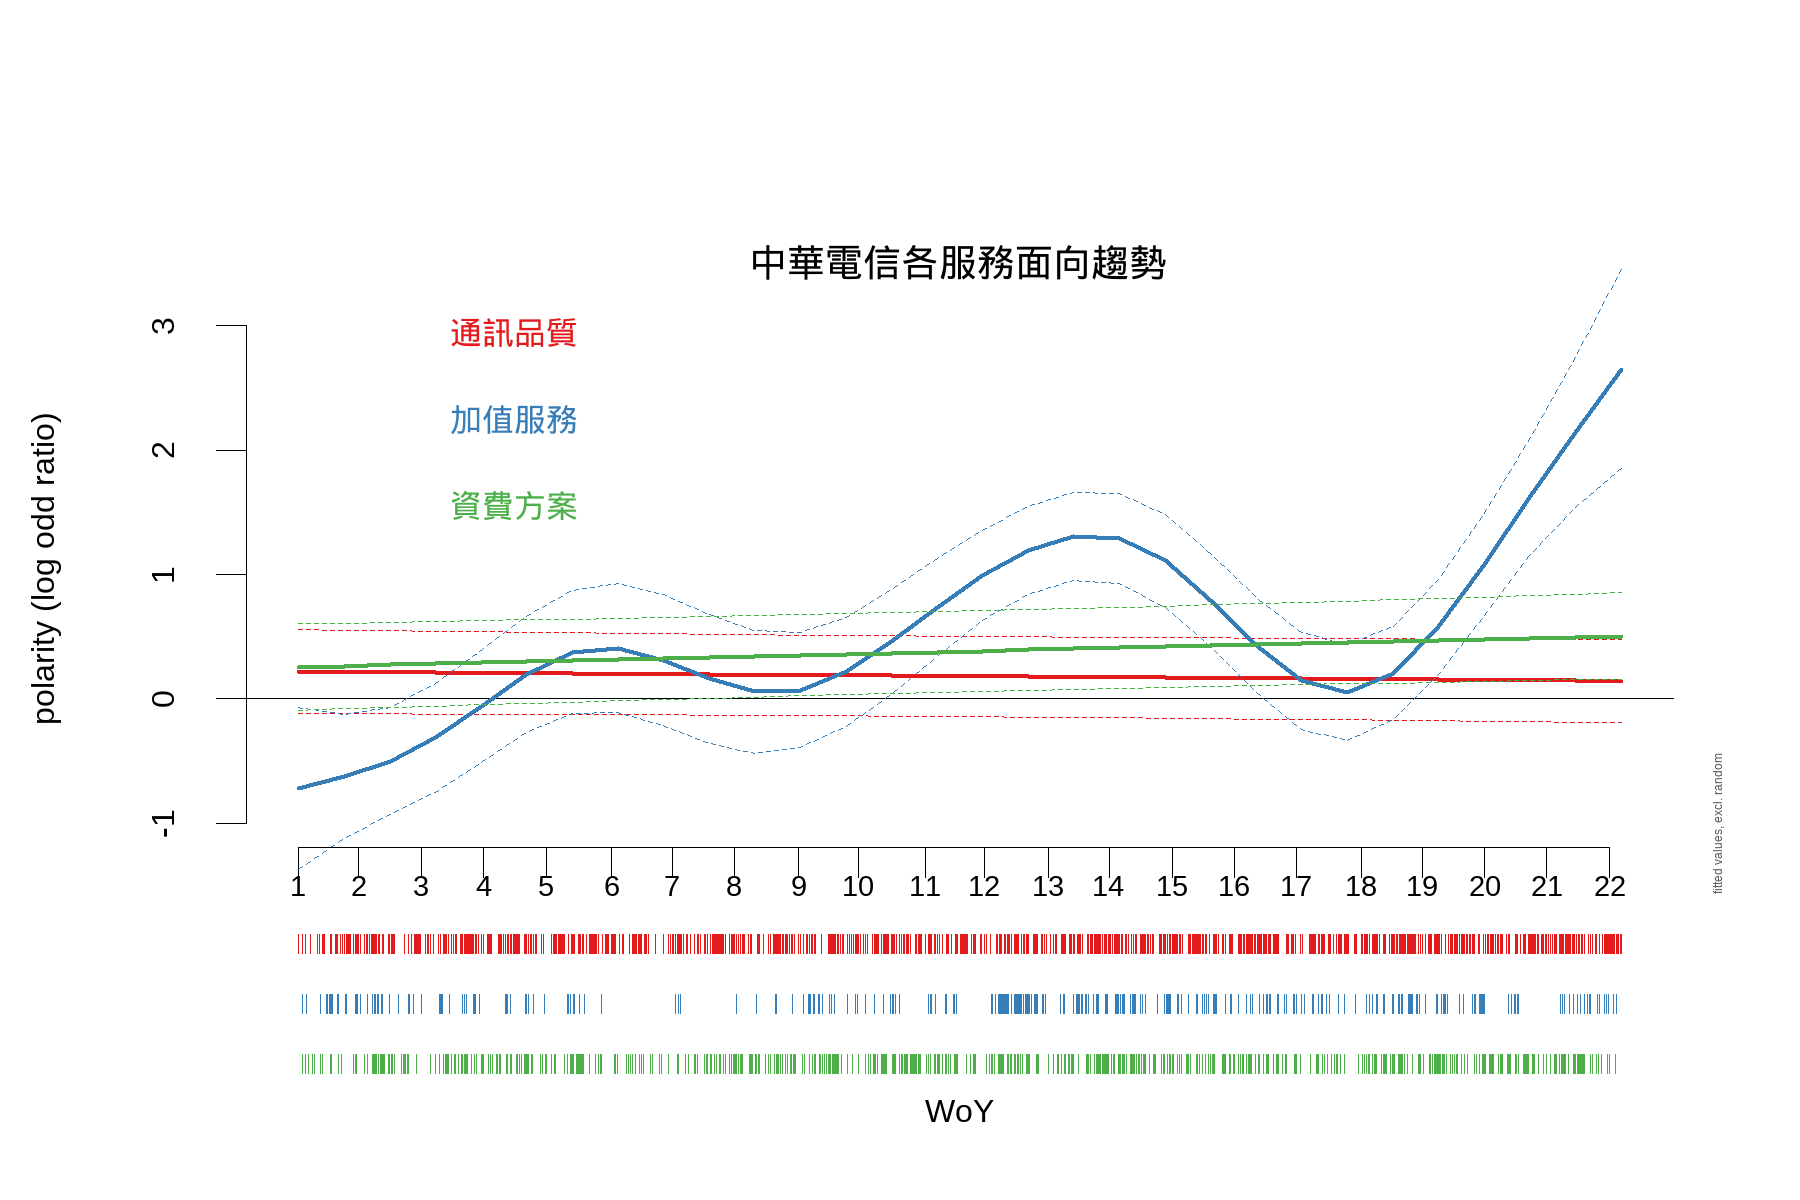

In [19]:
par(cex=2)
pal = brewer.pal(8, "Set1")
m1_plot.1 = plot_smooth(m1, view='ts', plot_all="category", col=brewer.pal(8, "Set1"), 
            lwd=3, legend_plot_all="topleft", shade=F,             
            ylab="polarity (log odd ratio)", xaxt='n', xlab="WoY", se=1, rug=F)
title("中華電信各服務面向趨勢", line=-.5)
axis(1, ts_ticks$ts, ts_ticks$woy, labels=ts_ticks$woy, cex.axis=0.9, pos=-1.2, mgp=c(2, 0, .5))
rug(cht_data$ts[cht_data$category=="通訊品質"], side=1, col=pal[1], line=1)
rug(cht_data$ts[cht_data$category=="加值服務"], side=1, col=pal[2], line=2)
rug(cht_data$ts[cht_data$category=="資費方案"], side=1, col=pal[3], line=3)

In [189]:
m1.src = get_modelterm(m1, select=4)
m1.src = m1.src[order(m1.src$fit),]
m1.src$ul = m1.src$fit+m1.src$se.fit
m1.src$ll = m1.src$fit-m1.src$se.fit
m1.src$source = factor(m1.src$source, levels=m1.srordered=T)

Summary:
	* source : factor with 20 values; set to the value(s): Android-台灣中文網, BabyHome 寶貝家庭親子網, Dcard, ePrice比價王, facebook粉絲團, Google Play App 評價, iTunes App 評價, Line Today, Meteor, mobile01, ... 


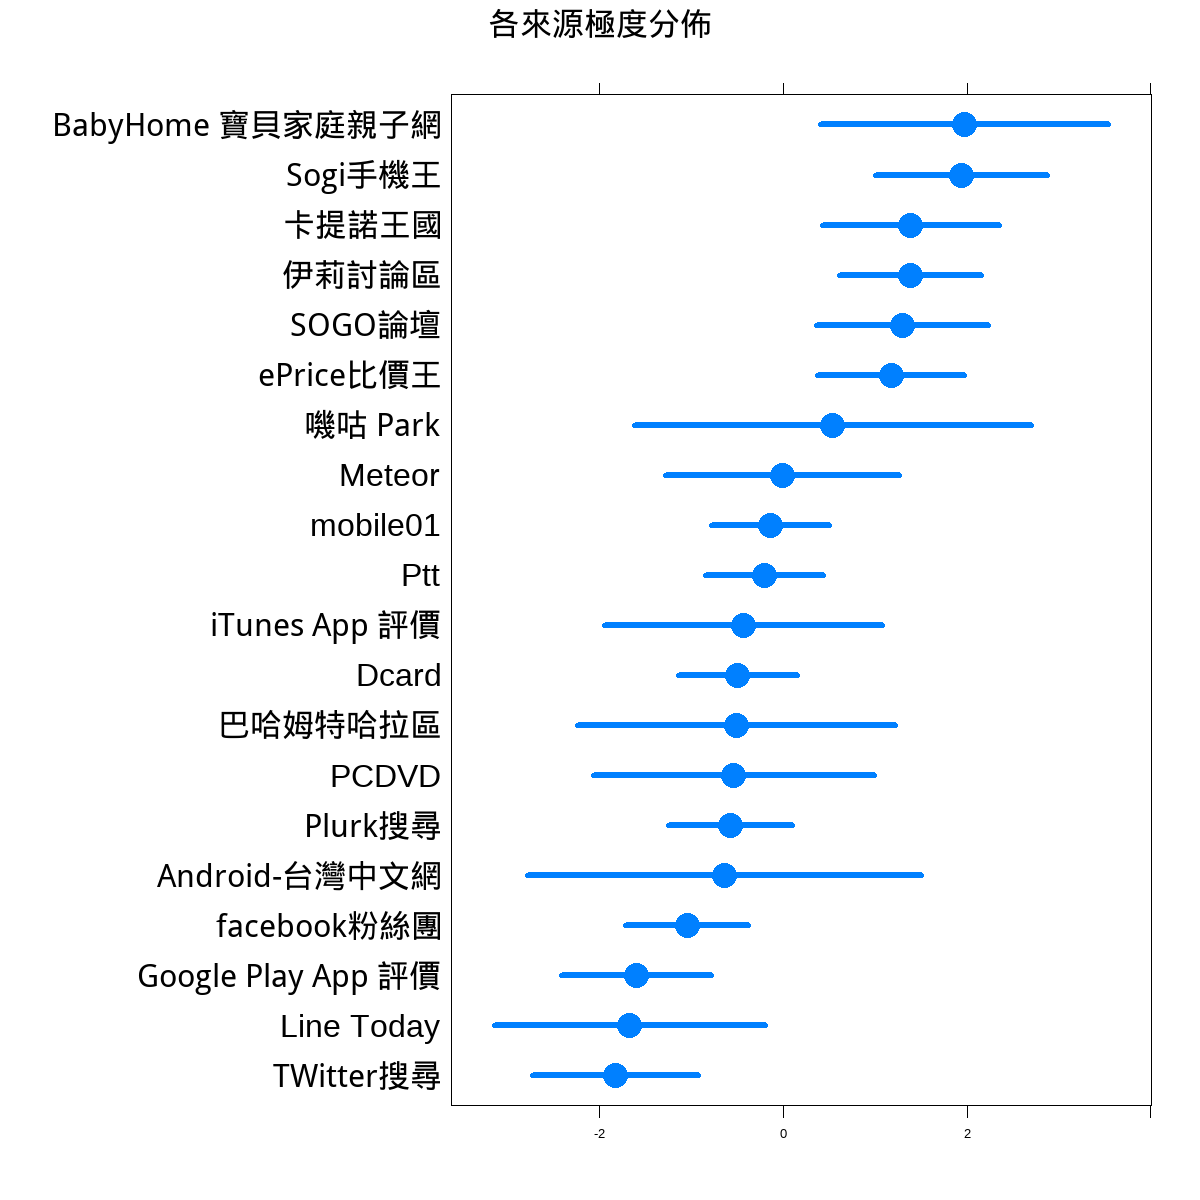

In [210]:
popt(8, 8, 150)
segplot(source~ll+ul, data=m1.src, centers=fit, draw.bands=F, 
        main=list("各來源極度分佈", cex=2),
        lwd=4, cex=2,         
        scales=list(y=list(cex=2)))


Method: ML   Optimizer: outer newton
full convergence after 7 iterations.
Gradient range [-0.0008563832,1.091615e-06]
(score 4741.814 & scale 1).
Hessian positive definite, eigenvalue range [0.0005671134,6.515671].
Model rank =  50 / 50 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                          k'   edf k-index p-value  
s(ts):category通訊品質  9.00  1.00    0.97   0.035 *
s(ts):category加值服務  9.00  6.17    0.97   0.015 *
s(ts):category資費方案  9.00  1.00    0.97   0.015 *
s(source)              20.00 15.16      NA      NA  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


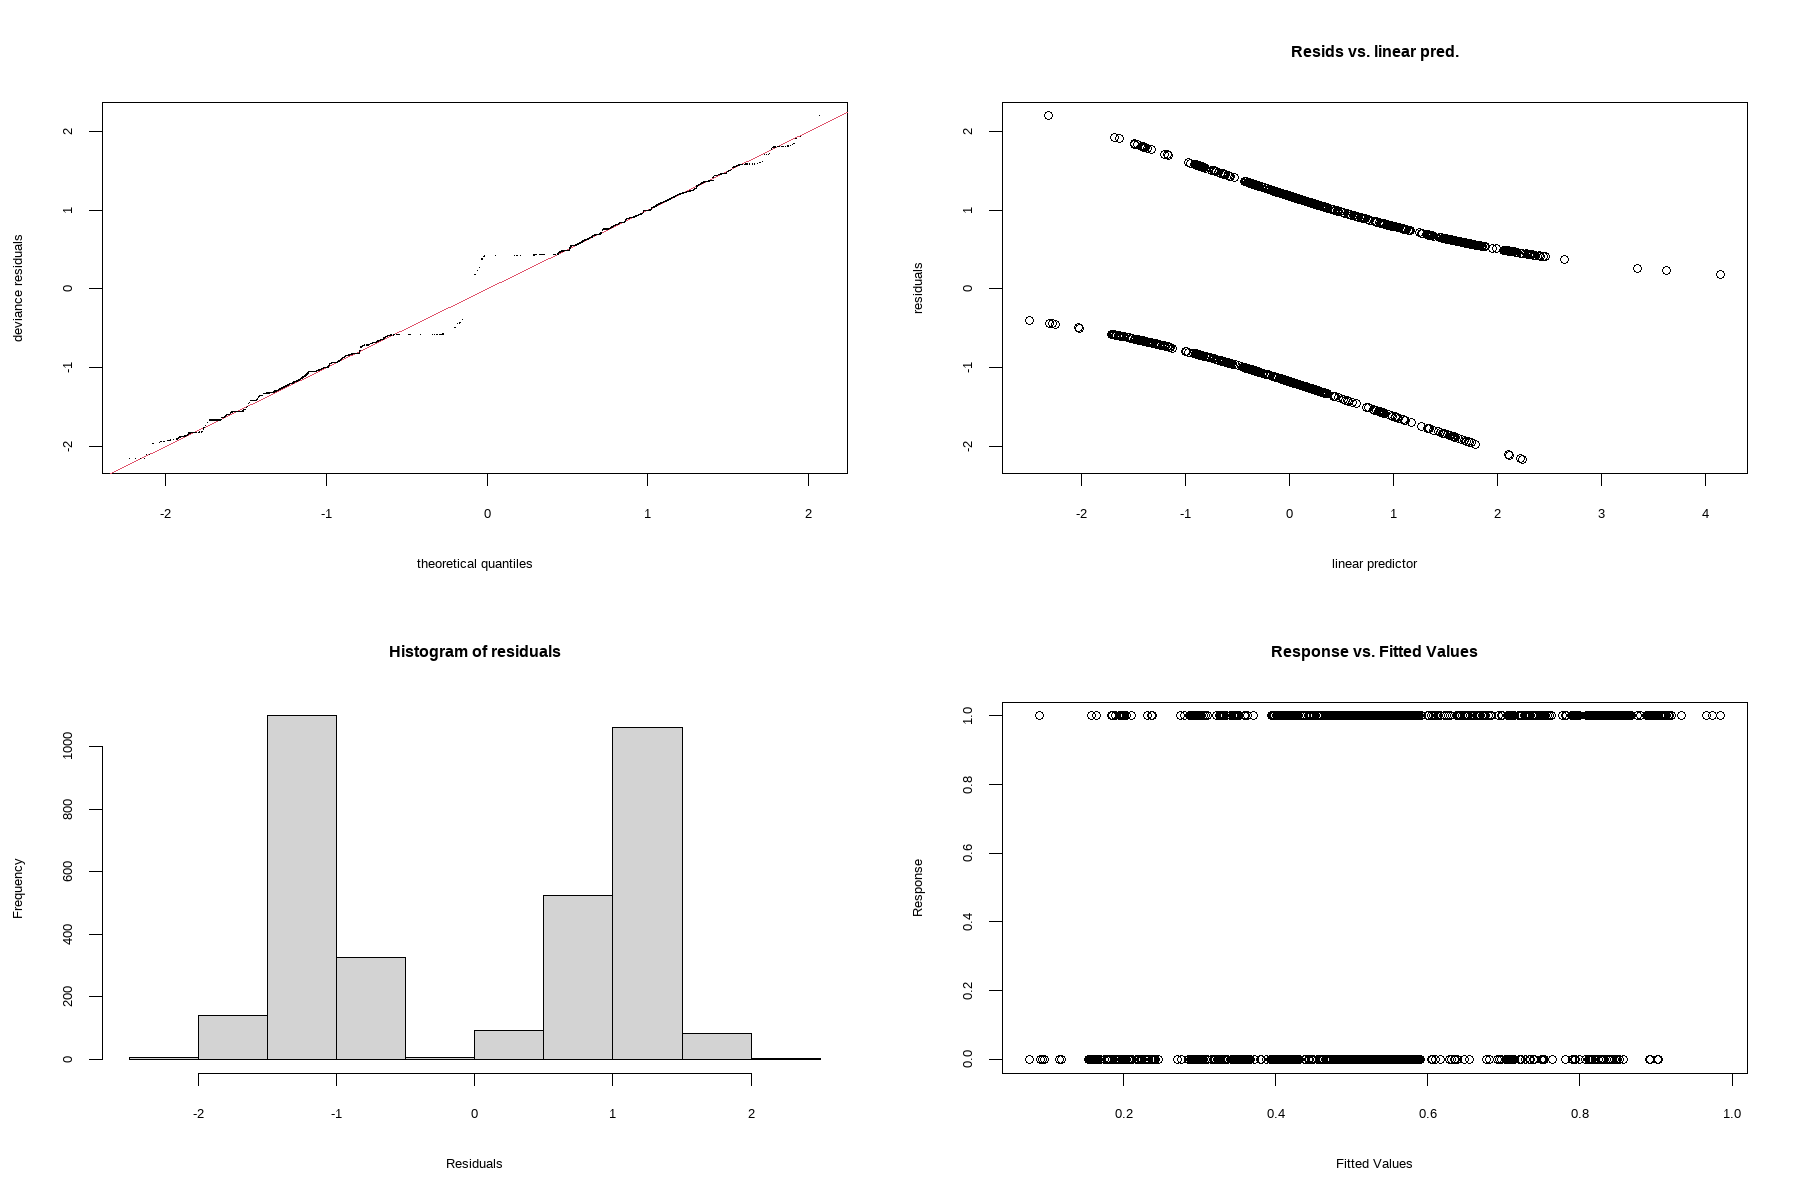

In [146]:
gam.check(m1)

In [19]:
range(data$woy)

[1]  1 53

In [20]:
ent_data$entity = relevel(factor(ent_data$entity), ref="遠傳電信")
m2 = bam(rating~entity+s(woy, by=entity), data = ent_data[ent_data$entity!="無框行動", ], family="binomial", method="ML")
summary(m2)


Family: binomial 
Link function: logit 

Formula:
rating ~ entity + s(woy, by = entity)

Parametric coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.41933    0.04009 -10.460  < 2e-16 ***
entity亞太電信    0.82456    0.07056  11.686  < 2e-16 ***
entity台灣之星    0.29356    0.06155   4.769 1.85e-06 ***
entity台灣大哥大  0.16036    0.06328   2.534   0.0113 *  
entity無         -0.65193    0.04797 -13.590  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                          edf Ref.df  Chi.sq  p-value    
s(woy):entity遠傳電信   8.674  8.966 576.075  < 2e-16 ***
s(woy):entity亞太電信   1.730  2.162   6.403 0.051205 .  
s(woy):entity台灣之星   3.155  3.930  22.673 0.000122 ***
s(woy):entity台灣大哥大 6.481  7.596  59.154  < 2e-16 ***
s(woy):entity無         8.804  8.988 672.043  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.124   Deviance explained = 

Summary:
	* entity : factor; set to the value(s): 亞太電信, 台灣之星, 台灣大哥大, 無, 遠傳電信. 
	* woy : numeric predictor; with 30 values ranging from 1.000000 to 22.000000. 
	* NOTE : No random effects in the model to cancel.
 


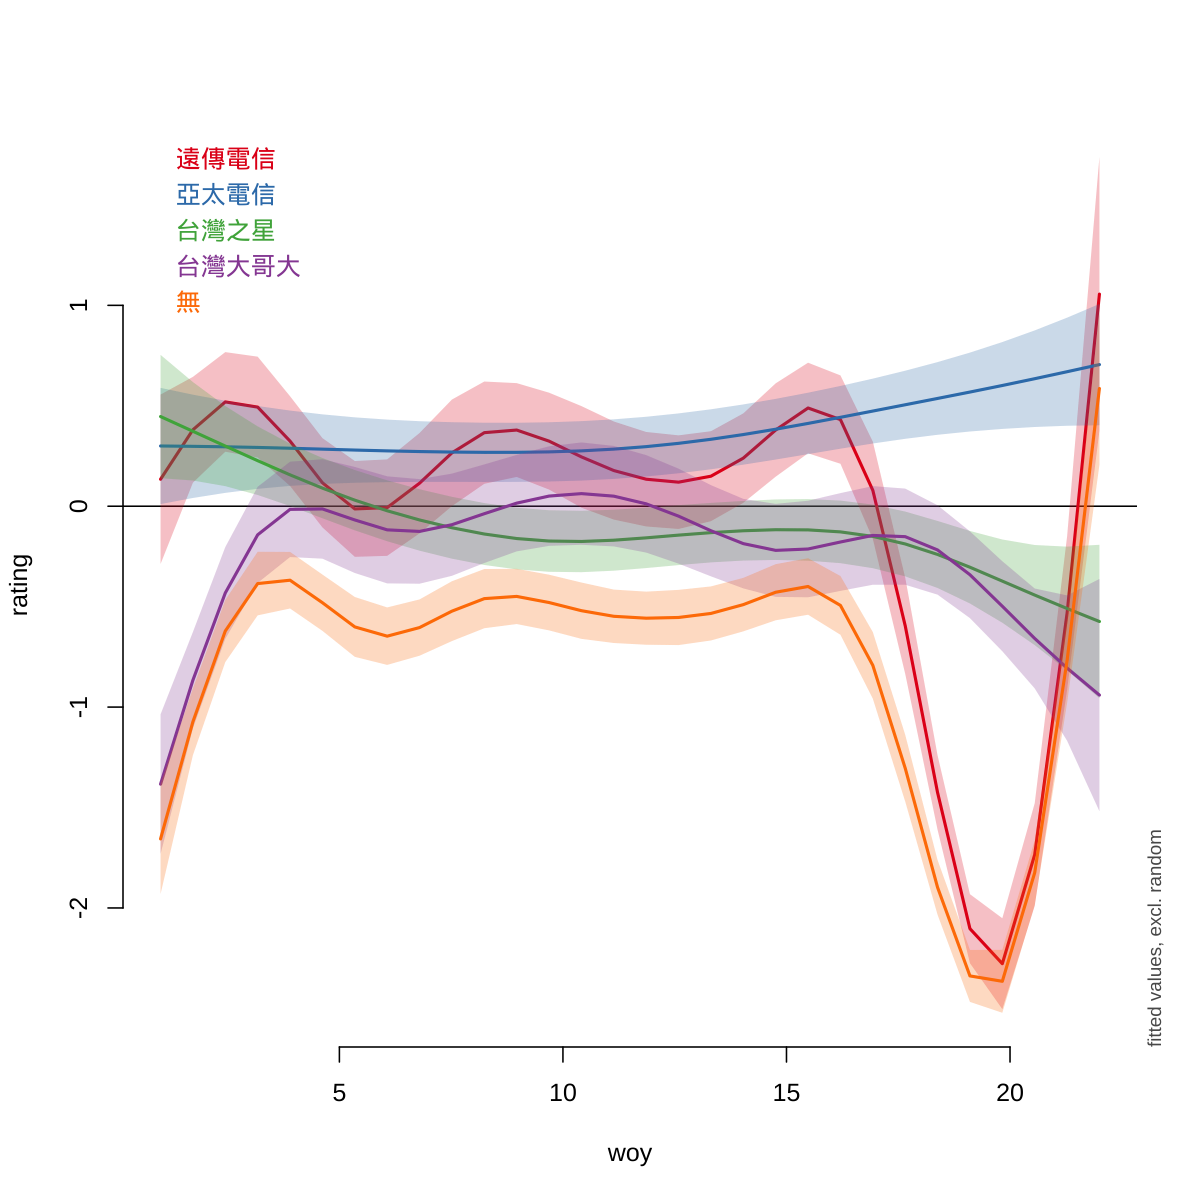

In [21]:
popt(8, 8, 150)
plot_smooth(m2, view="woy", plot_all="entity", 
            col=brewer.pal(8, "Set1"), lwd=2, legend_plot_all="topleft")

In [9]:
ent_data$entity = relevel(factor(ent_data$entity), ref="遠傳電信")
ent_data$source = factor(ent_data$source)
m3_data = ent_data[ent_data$entity!="無框行動", ]
m3 = bam(rating~entity+s(woy, by=entity)+s(source, bs="re"), 
         data = m3_data, family="binomial")
summary(m3)

ERROR: Error in factor(ent_data$entity): object 'ent_data' not found


Summary:
	* entity : factor; set to the value(s): 亞太電信, 台灣之星, 台灣大哥大, 無, 遠傳電信. 
	* woy : numeric predictor; with 30 values ranging from 1.000000 to 22.000000. 
	* NOTE : No random effects in the model to cancel.
 
Summary:
	* entity : factor; set to the value(s): 亞太電信, 台灣之星, 台灣大哥大, 無, 遠傳電信. 
	* woy : numeric predictor; with 30 values ranging from 1.000000 to 22.000000. 
	* source : factor; set to the value(s): Ptt. (Might be canceled as random effect, check below.) 
	* NOTE : The following random effects columns are canceled: s(source)
 


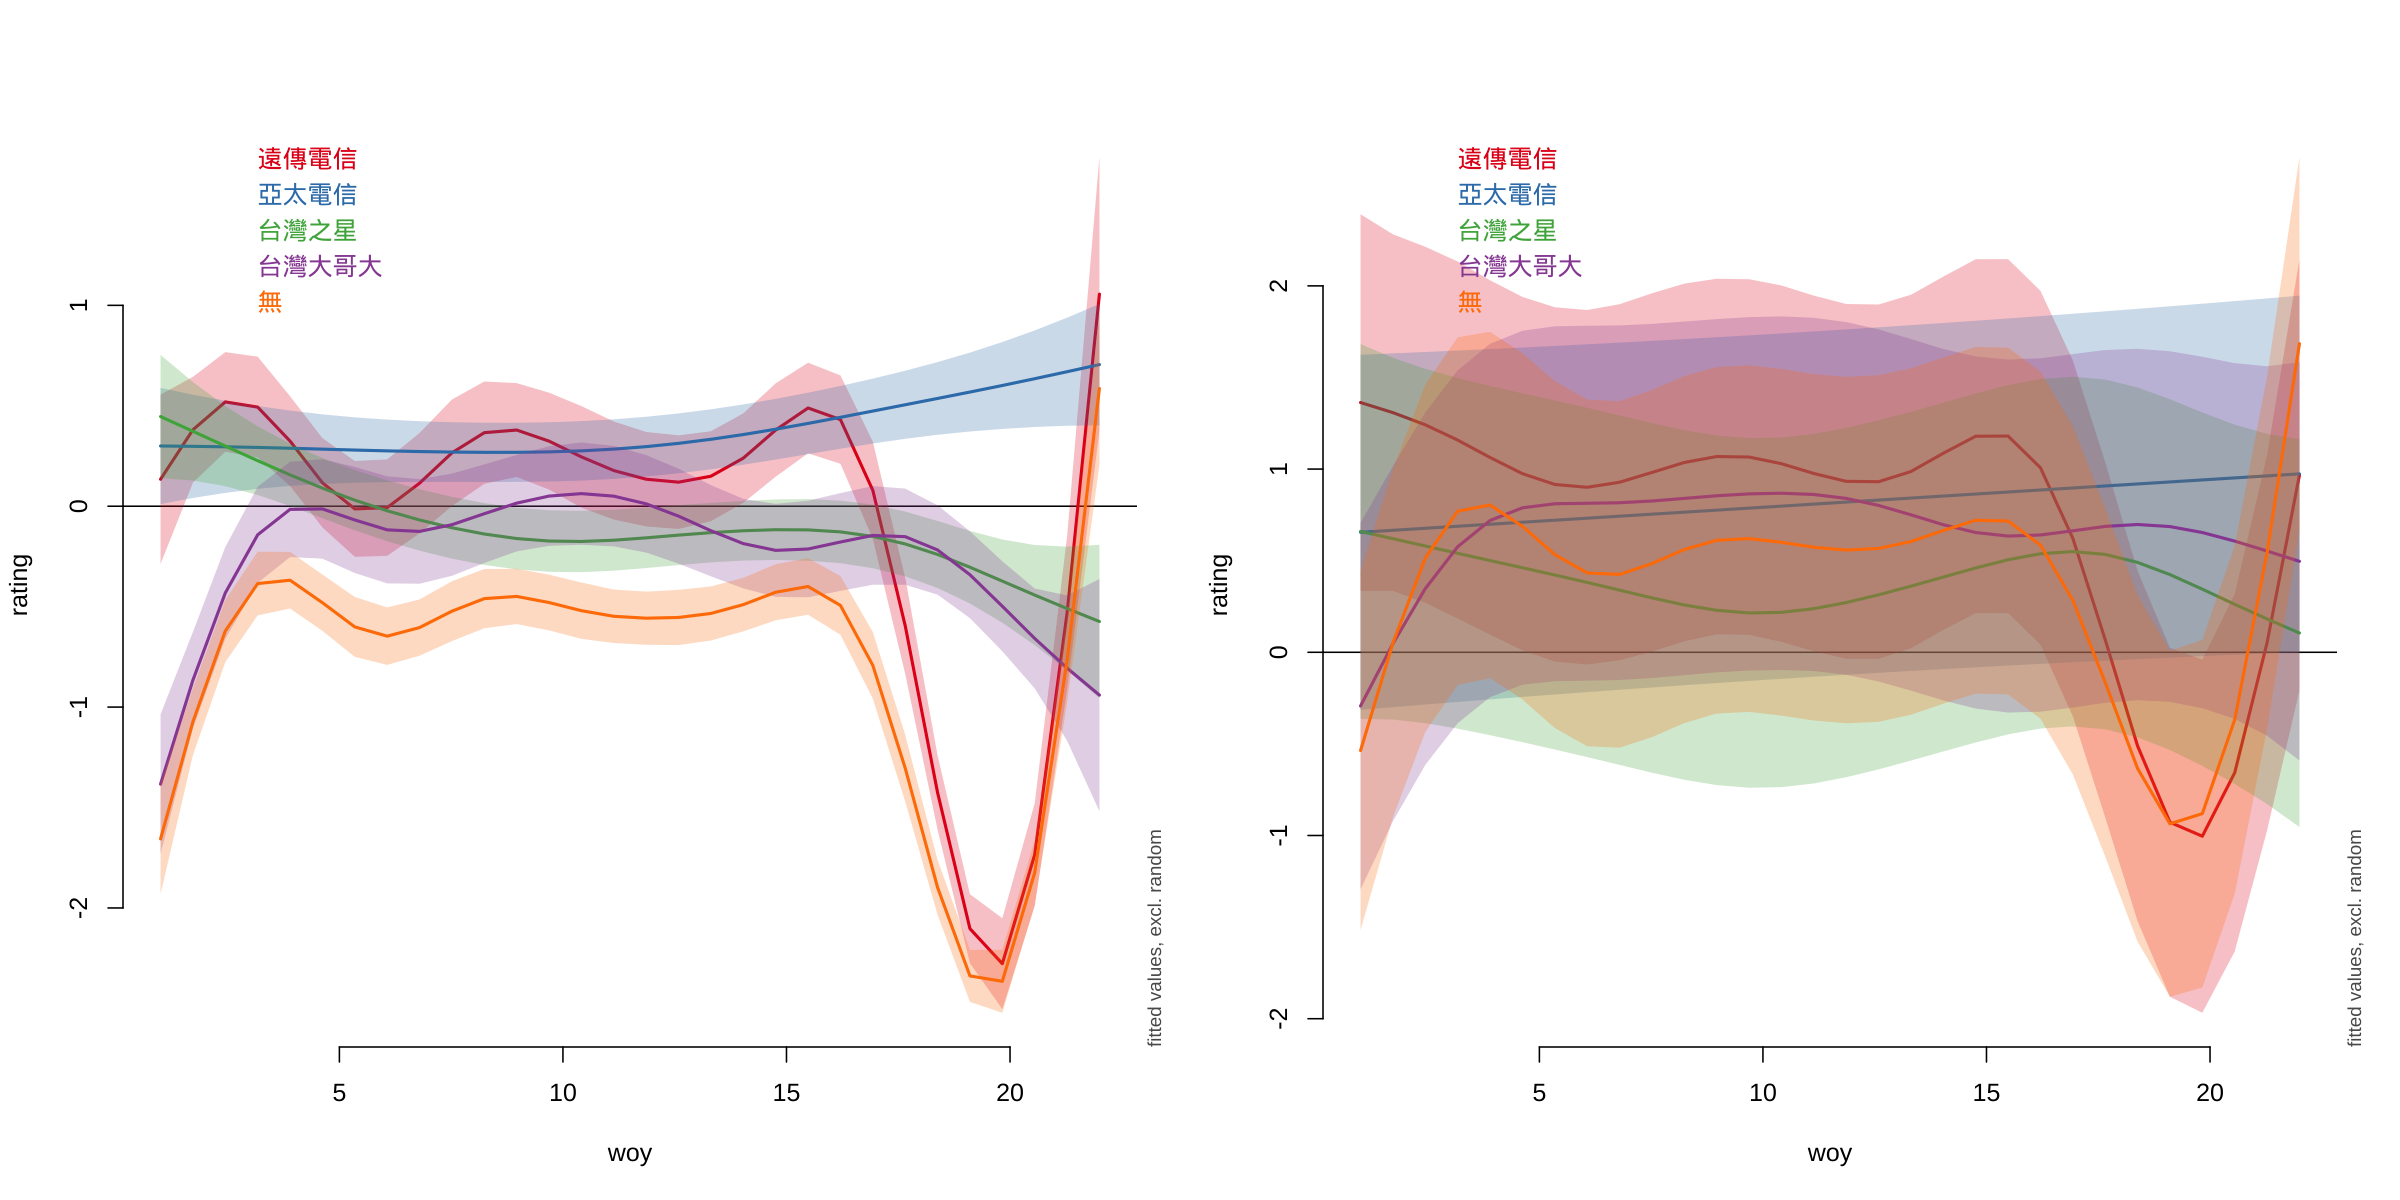

In [29]:
popt(16, 8, 150)
par(mfrow=c(1, 2))
plot_smooth(m2, view="woy", plot_all="entity", 
            col=brewer.pal(8, "Set1"), lwd=2, legend_plot_all="topleft")
plot_smooth(m3, view="woy", plot_all="entity", 
            col=brewer.pal(8, "Set1"), lwd=2, legend_plot_all="topleft")

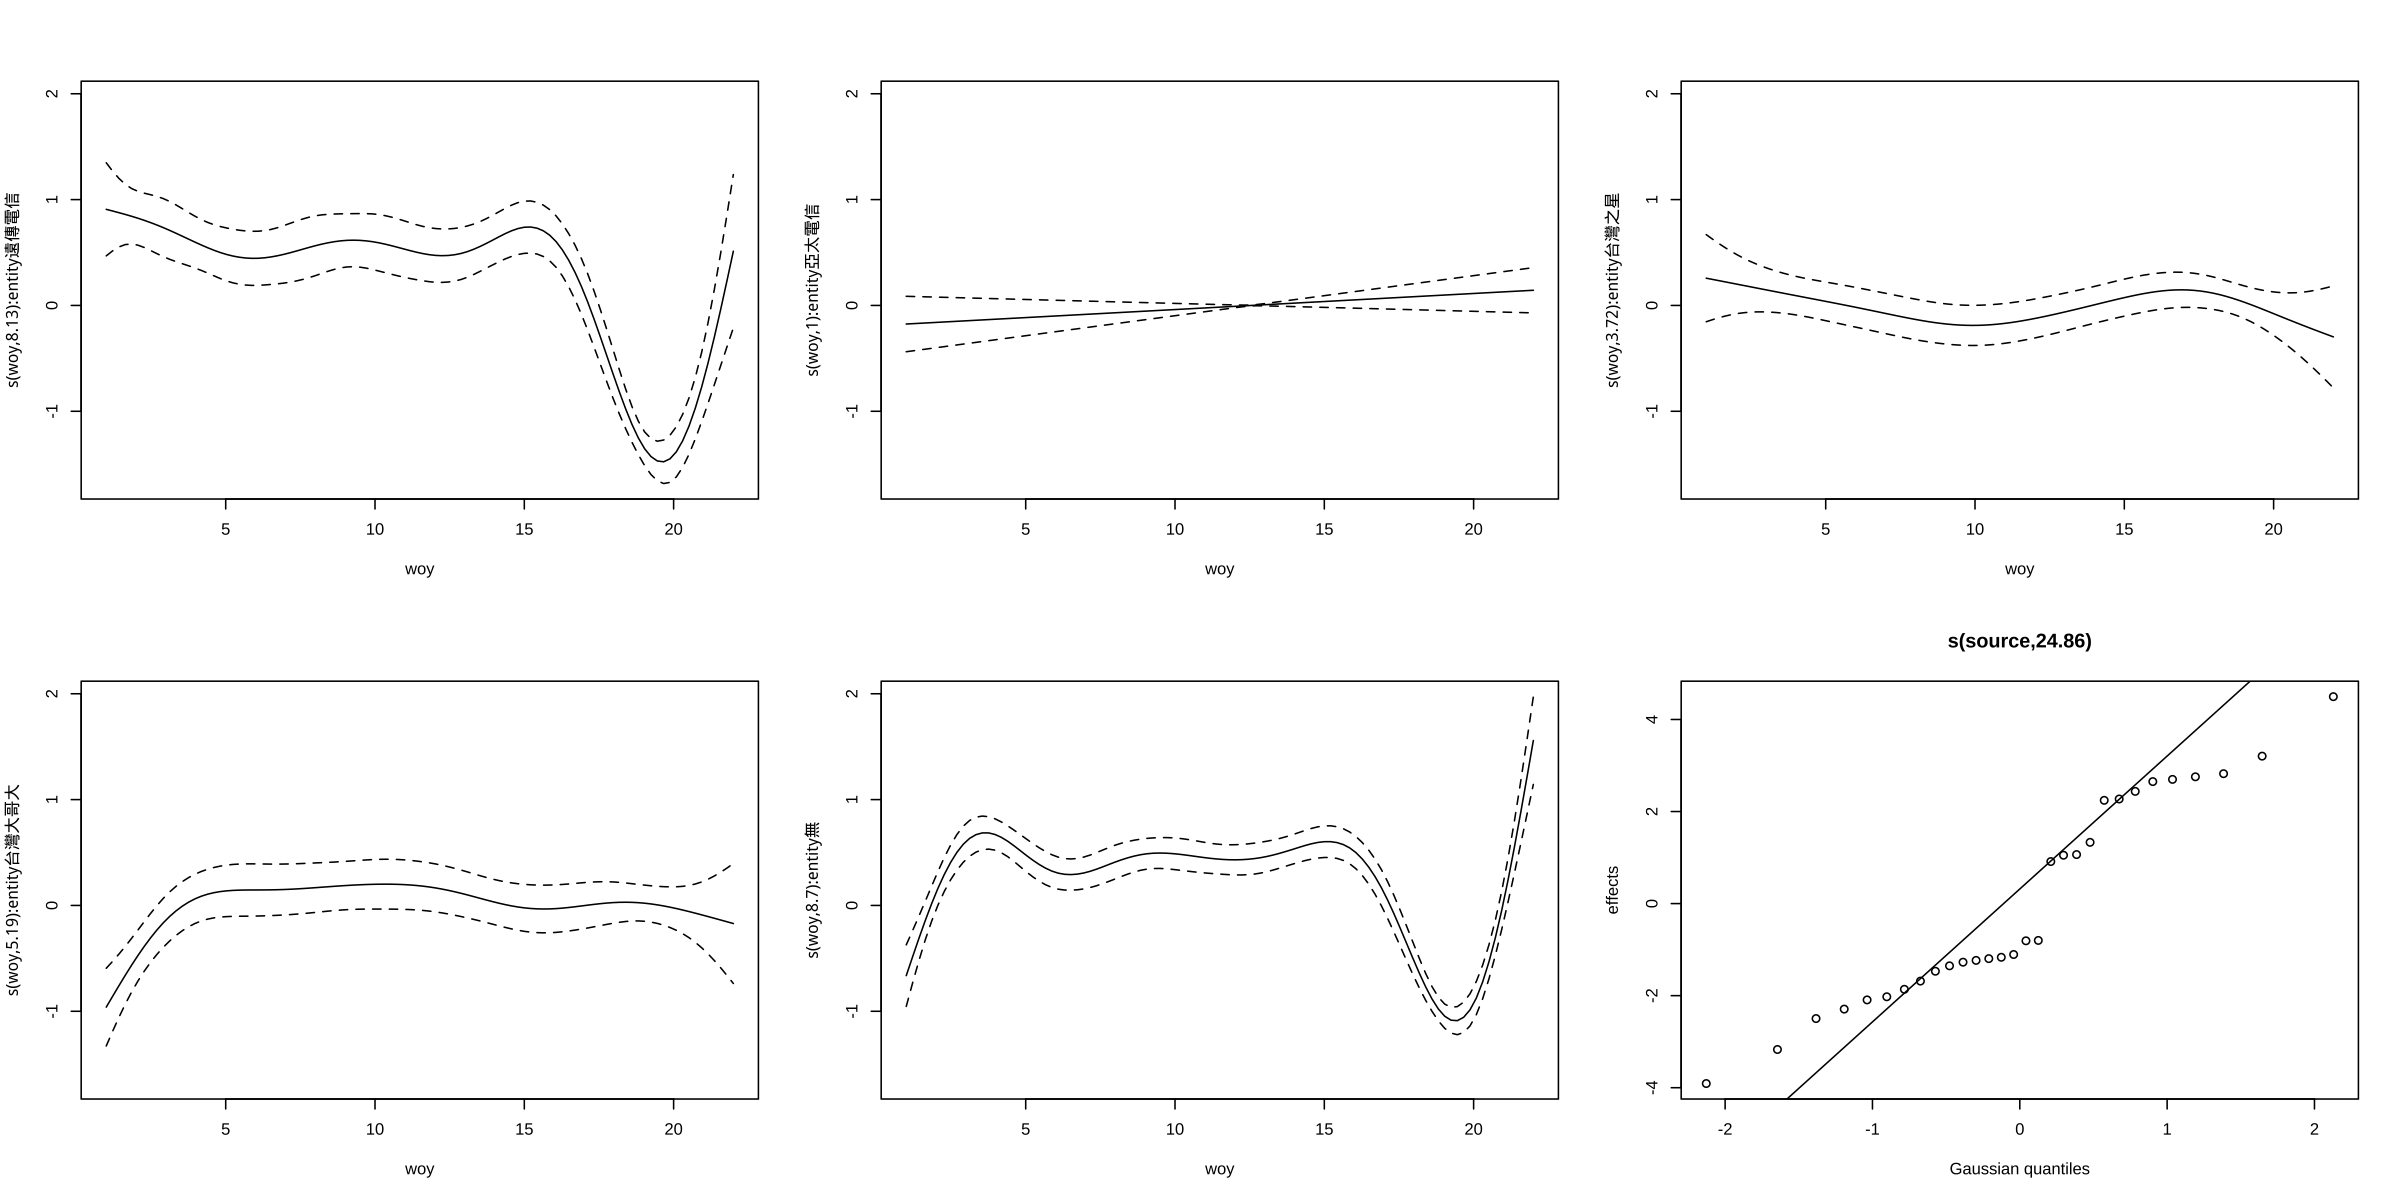

In [44]:
plot(m3, page=1)

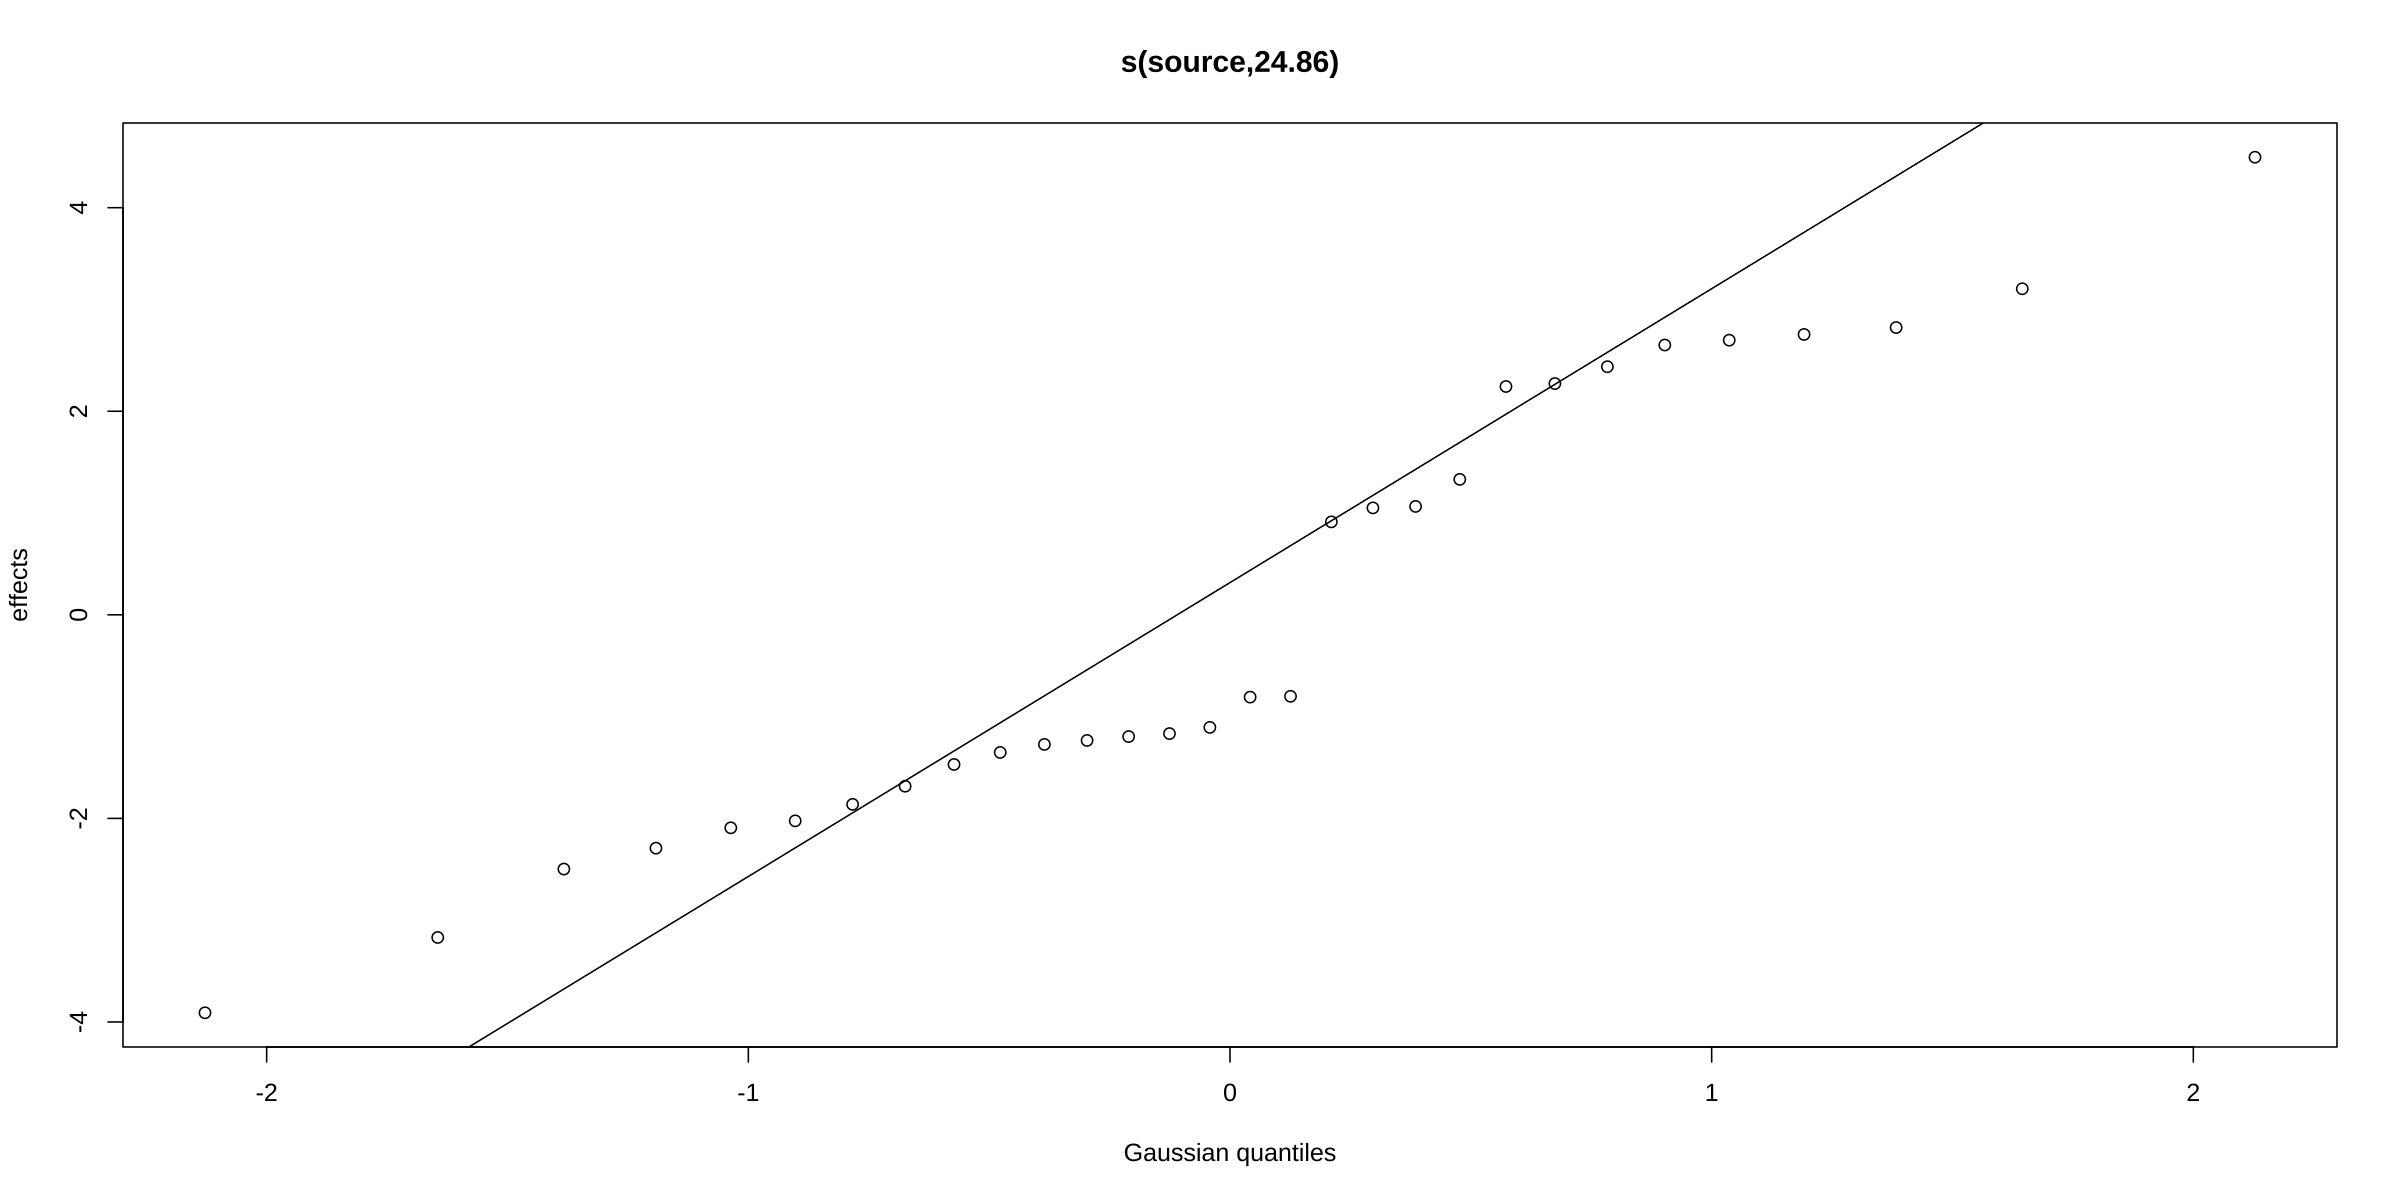

In [42]:
plot(m3, select=6)

Summary:
	* entity : factor; set to the value(s): 台灣大哥大. 
	* woy : numeric predictor; with 30 values ranging from 1.000000 to 22.000000. 
	* source : factor with 30 values; set to the value(s): 2home 打造桃花源, Android-台灣中文網, BabyHome 寶貝家庭親子網, Dcard, FashionGuide, GNN 新聞網, Google Play App 評價, Line Today, Luckydog, Meteor, ... 


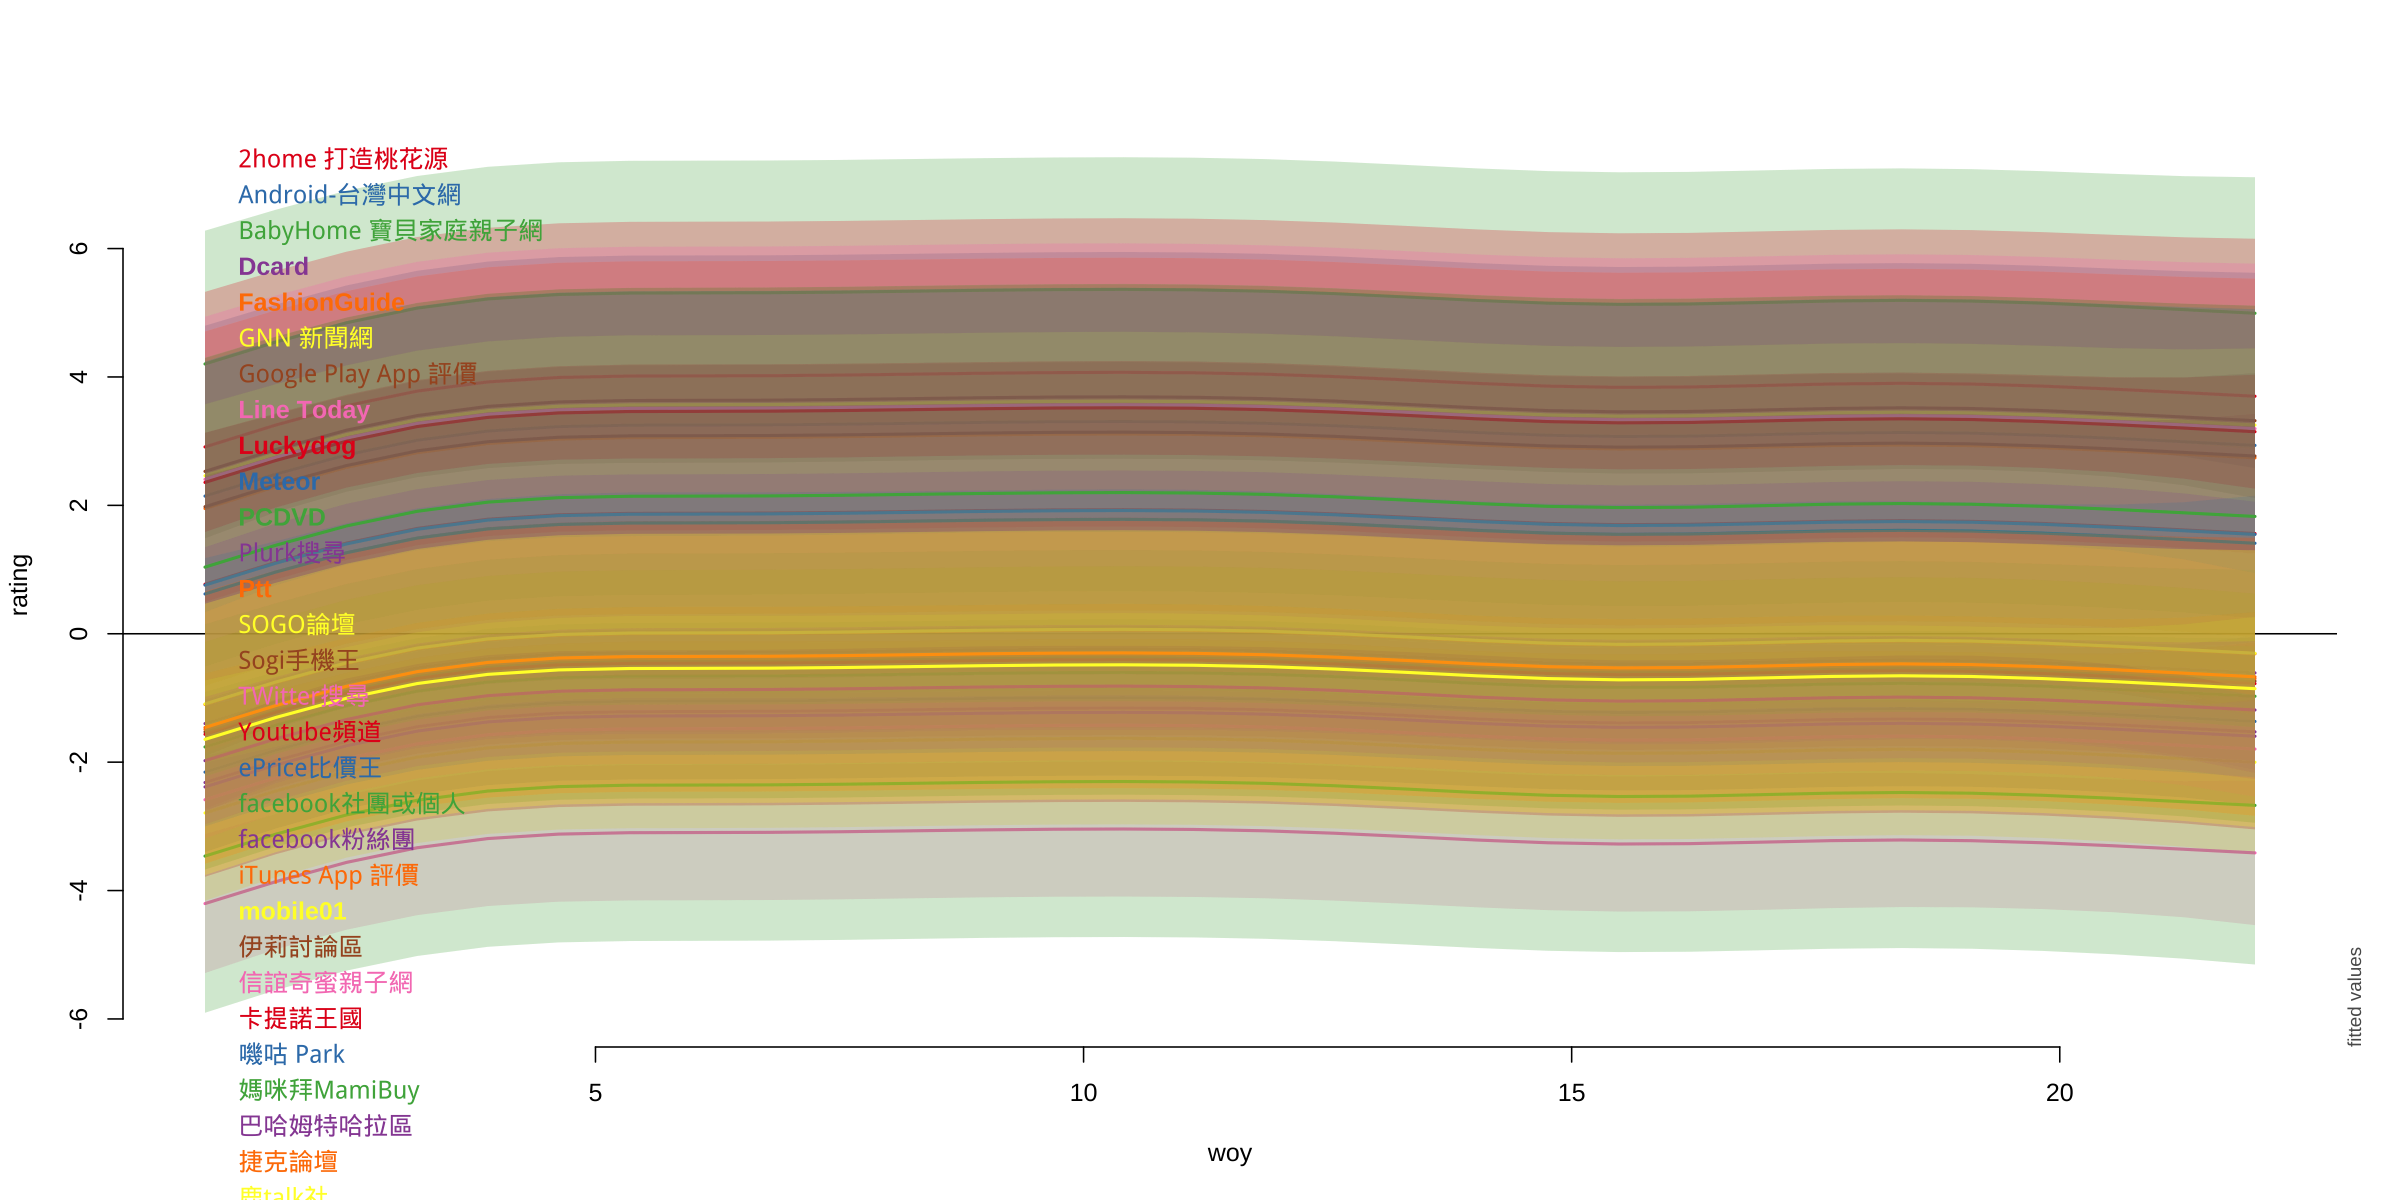

In [45]:
plot_smooth(m3, view="woy", plot_all="source", cond=list(entity="台灣大哥大"), 
            col=brewer.pal(8, "Set1"), lwd=2, legend_plot_all="topleft", rm.ranef=F)

In [38]:
get_modelterm(m3, select=6)

Summary:
	* source : factor with 30 values; set to the value(s): 2home 打造桃花源, Android-台灣中文網, BabyHome 寶貝家庭親子網, Dcard, FashionGuide, GNN 新聞網, Google Play App 評價, Line Today, Luckydog, Meteor, ... 


source                  fit        se.fit   
1  2home 打造桃花源         1.0650325 3.4926732
2  Android-台灣中文網       2.4377442 2.6939646
3  BabyHome 寶貝家庭親子網  4.4957634 2.1742284
4  Dcard                   -1.1059442 0.9388655
5  FashionGuide             2.2433115 2.7892776
6  GNN 新聞網              -2.4977268 1.5722054
7  Google Play App 評價    -1.2340169 0.9397280
8  Line Today              -3.9096137 1.3550486
9  Luckydog                 3.2033402 2.4771930
10 Meteor                  -1.8621815 1.4762547
11 PCDVD                   -1.4699668 2.0414601
12 Plurk搜尋               -2.0241706 0.9538148
13 Ptt                     -1.1958373 0.9369943
14 SOGO論壇                 2.7546132 1.3759162
15 Sogi手機王               2.8223446 1.0413320
16 TWitter搜尋             -2.2923439 1.0452690
17 Youtube頻道             -1.2731394 2.3112055
18 ePrice比價王             1.0507650 0.9578693
19 facebook社團或個人      -3.1698061 2.4997359
20 facebook粉絲團          -2.0925918 0.9401995
21 iTunes App 評價         -0.8084547 0.9841395
22 mobile01                -0.8003089 0.9365344
23 伊莉討論區               2.2723228 0.9871160
24 信誼奇蜜親子網           2.6983760 2.5836775
25 卡提諾王國               2.6506992 1.1426760
26 嘰咕 Park                0.9132845 3.5860995
27 媽咪拜MamiBuy            1.3309506 3.2515564
28 巴哈姆特哈拉區          -1.6838423 1.2871400
29 捷克論壇                -1.1666116 2.2147648
30 鹿talk社                -1.3519913 2.2067138


Method: fREML   Optimizer: perf newton
full convergence after 8 iterations.
Gradient range [-0.0002077186,1.651252e-07]
(score 24983.12 & scale 1).
Hessian positive definite, eigenvalue range [0.0002075993,10.35367].
Model rank =  80 / 80 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                           k'   edf k-index p-value  
s(woy):entity遠傳電信    9.00  8.13    0.97   0.055 .
s(woy):entity亞太電信    9.00  1.00    0.97   0.090 .
s(woy):entity台灣之星    9.00  3.72    0.97   0.080 .
s(woy):entity台灣大哥大  9.00  5.19    0.97   0.060 .
s(woy):entity無          9.00  8.70    0.97   0.075 .
s(source)               30.00 24.86      NA      NA  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


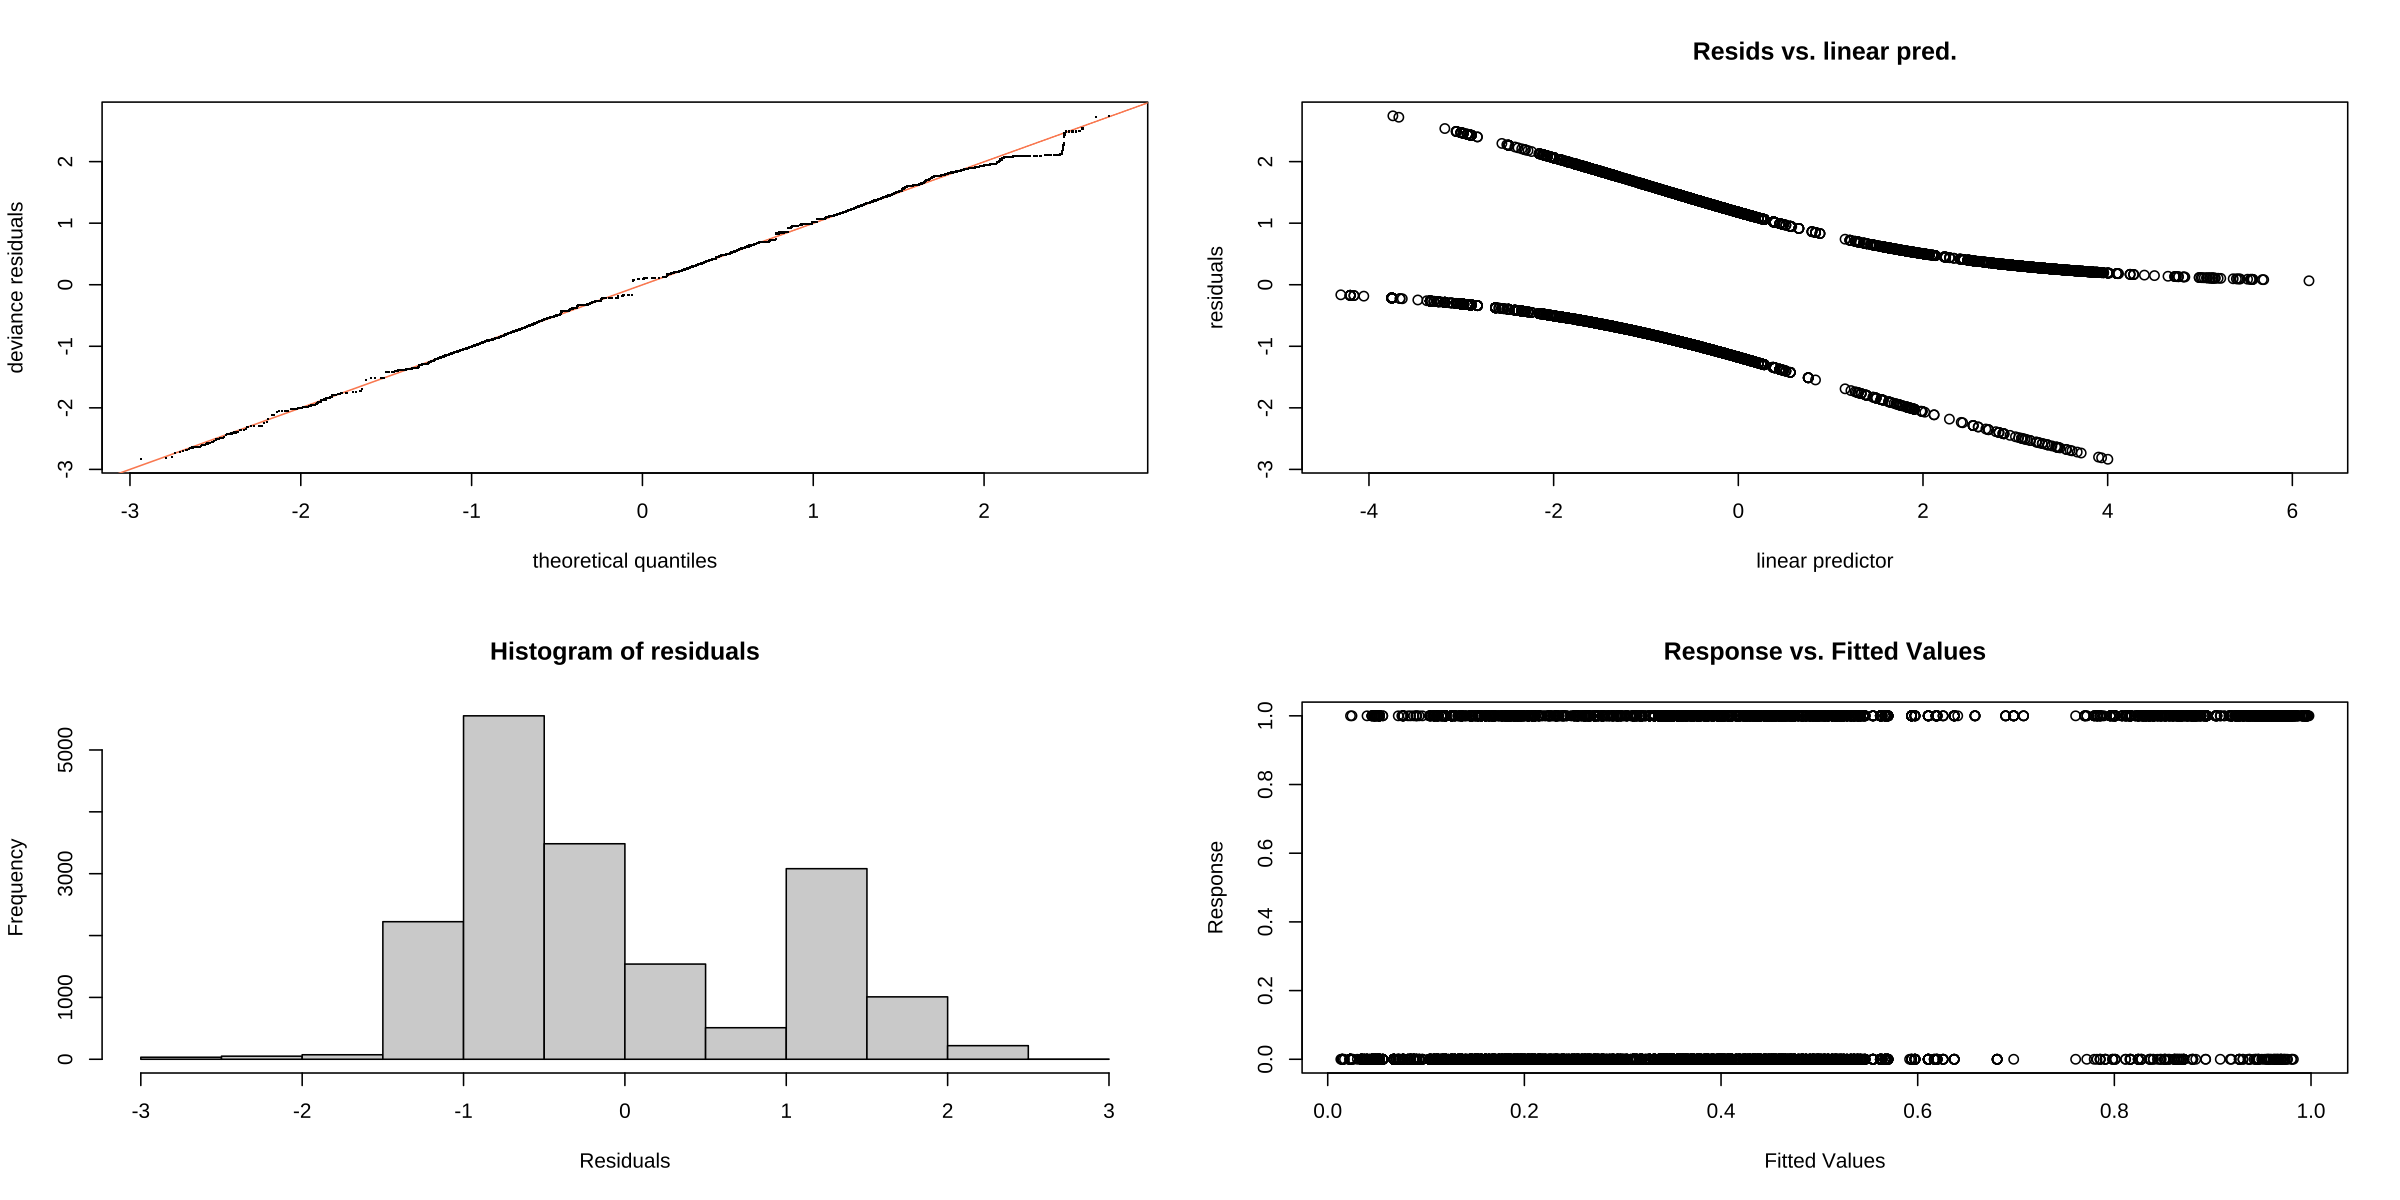

In [30]:
gam.check(m3)

In [24]:
unique(m3_data$source)

[1] Dcard                   ePrice比價王            facebook粉絲團         
 [4] Google Play App 評價    iTunes App 評價         mobile01               
 [7] Ptt                     Plurk搜尋               SOGO論壇               
[10] 伊莉討論區              GNN 新聞網              Line Today             
[13] PCDVD                   Sogi手機王              TWitter搜尋            
[16] 卡提諾王國              Youtube頻道             Android-台灣中文網     
[19] BabyHome 寶貝家庭親子網 巴哈姆特哈拉區          Meteor                 
[22] FashionGuide            媽咪拜MamiBuy           facebook社團或個人     
[25] 捷克論壇                鹿talk社                信誼奇蜜親子網         
[28] 2home 打造桃花源        嘰咕 Park               Luckydog               
30 Levels: 2home 打造桃花源 Android-台灣中文網 ... 鹿talk社

Summary:
	* entity : factor; set to the value(s): 遠傳電信. 
	* woy : numeric predictor; with 30 values ranging from 1.000000 to 22.000000. 
	* source : factor; set to the value(s): facebook粉絲團. 
Summary:
	* entity : factor; set to the value(s): 遠傳電信. 
	* woy : numeric predictor; with 30 values ranging from 1.000000 to 22.000000. 
	* source : factor; set to the value(s): Line Today. 


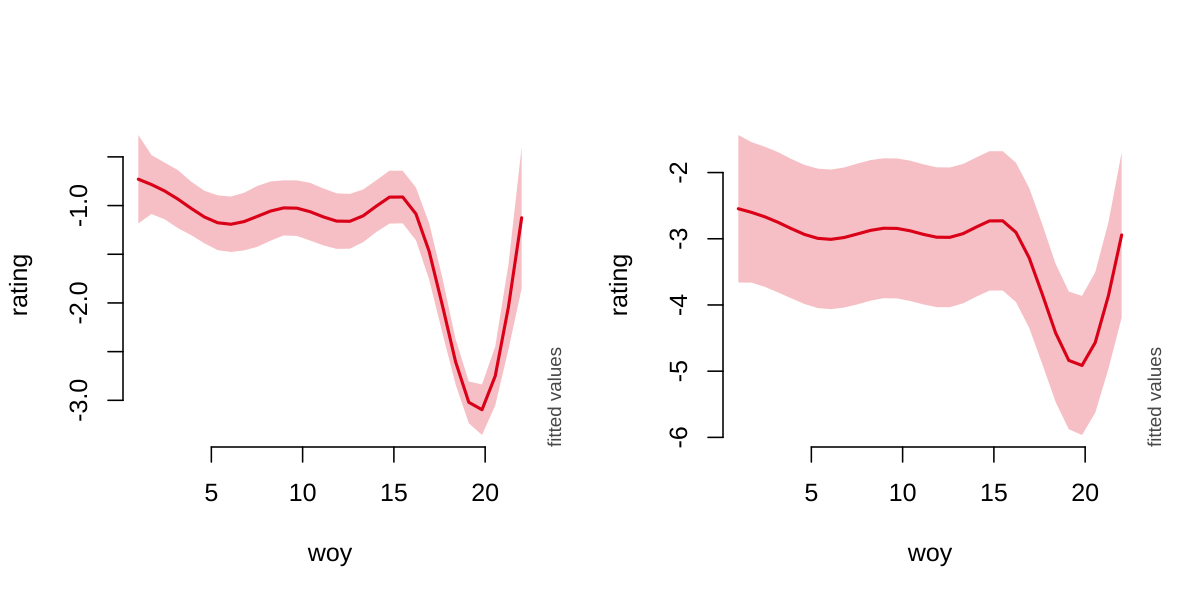

In [25]:
popt(8, 4, 150)
par(mfrow=c(1, 2))
plot_smooth(m3, view="woy",             
            cond=list(entity="遠傳電信", source="facebook粉絲團"),
            col=brewer.pal(8, "Set1"), lwd=2,             
            legend_plot_all="topleft", rm.ranef=F)
plot_smooth(m3, view="woy",             
            cond=list(entity="遠傳電信", source="Line Today"),
            col=brewer.pal(8, "Set1"), lwd=2,             
            legend_plot_all="topleft", rm.ranef=F)

Warning message in plot_smooth(m3, view = "woy", cond = list(entity = "遠傳電信", :
“source in cond and in plot_all. Not all levels are being plotted.”


Summary:
	* entity : factor; set to the value(s): 遠傳電信. 
	* woy : numeric predictor; with 30 values ranging from 1.000000 to 22.000000. 
	* source : factor; set to the value(s): Line Today, facebook粉絲團. 


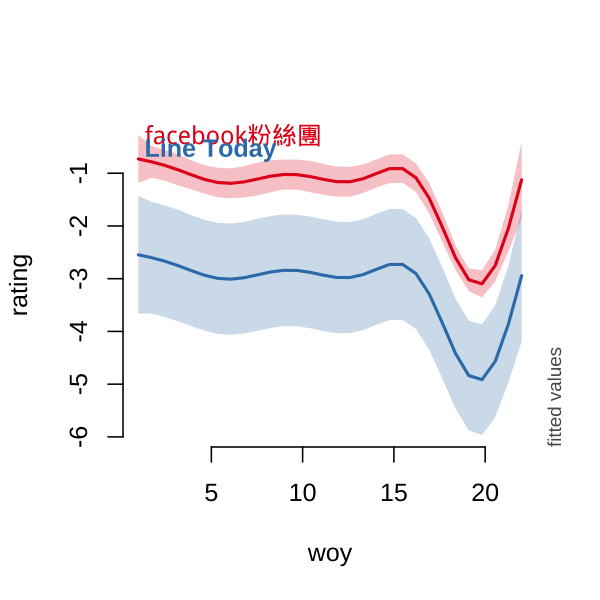

In [26]:
popt(4, 4, 150)
plot_smooth(m3, view="woy",             
            cond=list(entity="遠傳電信", source=c("facebook粉絲團", "Line Today")),
            plot_all="source",
            col=brewer.pal(8, "Set1"), lwd=2,             
            legend_plot_all="topleft", rm.ranef=F)

In [39]:
m4 = bam(rating~entity+s(woy, by=entity)+s(woy, source, bs="fs", m=1), 
         data = m3_data, family="binomial")

In [40]:
summary(m4)


Family: binomial 
Link function: logit 

Formula:
rating ~ entity + s(woy, by = entity) + s(woy, source, bs = "fs", 
    m = 1)

Parametric coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.46843    0.47541   0.985  0.32447    
entity亞太電信    0.29475    0.08519   3.460  0.00054 ***
entity台灣之星   -0.12602    0.07254  -1.737  0.08233 .  
entity台灣大哥大  0.16067    0.07245   2.218  0.02658 *  
entity無         -0.33943    0.05672  -5.984 2.18e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                           edf  Ref.df   Chi.sq  p-value    
s(woy):entity遠傳電信    6.958   7.958   64.823  < 2e-16 ***
s(woy):entity亞太電信    1.000   1.000    0.026    0.871    
s(woy):entity台灣之星    1.000   1.001    0.339    0.560    
s(woy):entity台灣大哥大  6.590   7.651   33.066 4.41e-05 ***
s(woy):entity無          8.244   8.751  114.430  < 2e-16 ***
s(woy,source)           86.510 188.000 1935.742  < 2e

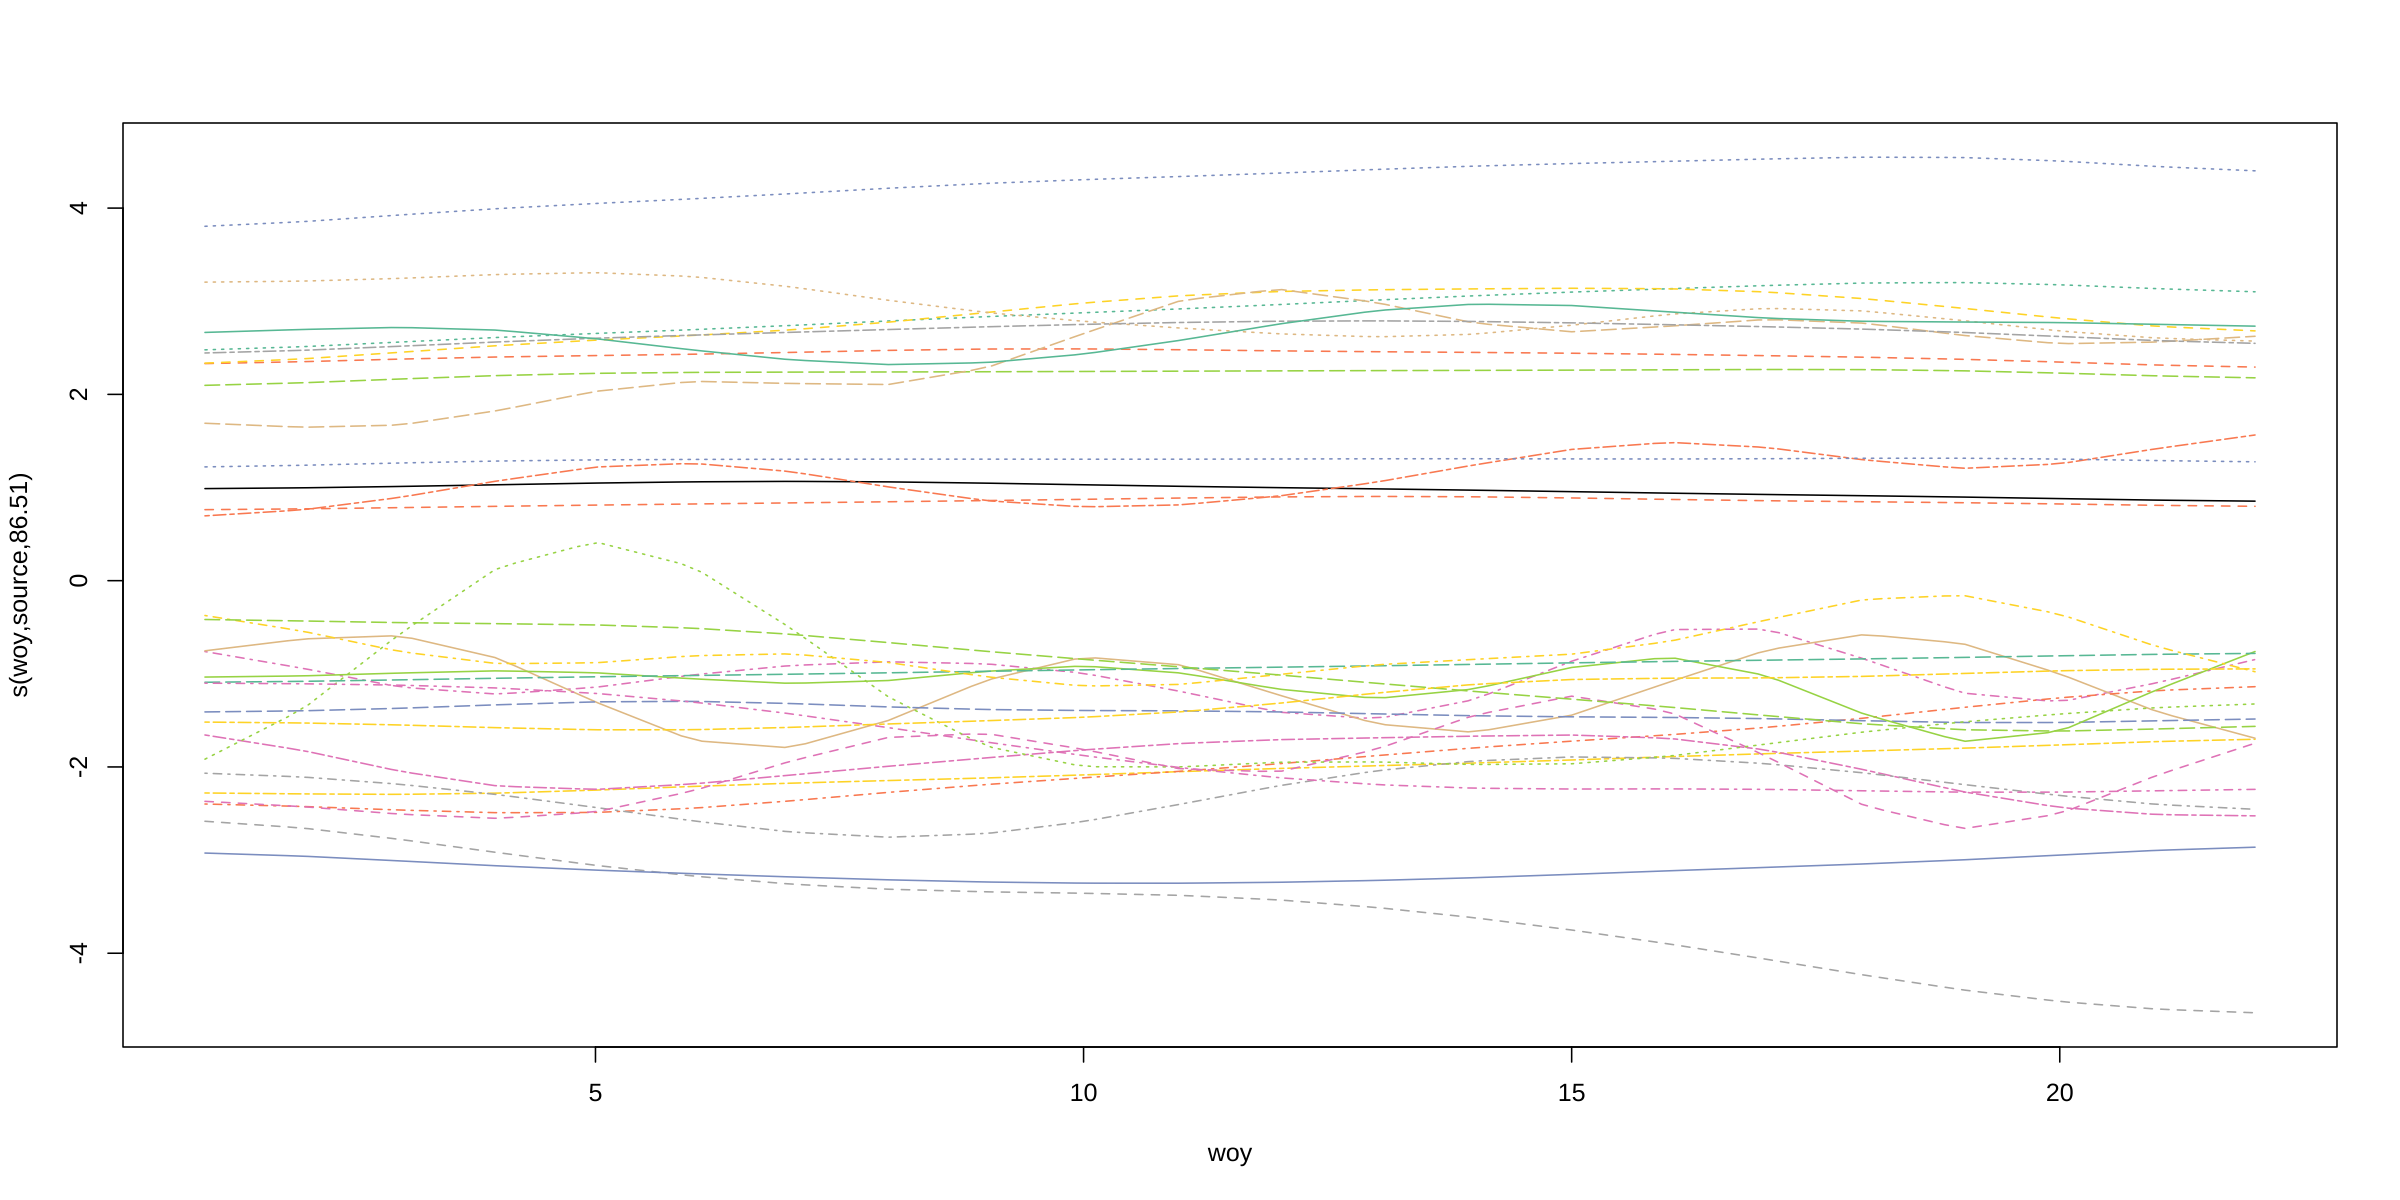

In [41]:
plot(m4, select=6)

Warning message in plot_smooth(m4, view = "woy", plot_all = "entity", cond = list(entity = c("遠傳電信", :
“entity in cond and in plot_all. Not all levels are being plotted.”


Summary:
	* entity : factor; set to the value(s): 台灣大哥大, 遠傳電信. 
	* woy : numeric predictor; with 30 values ranging from 1.000000 to 22.000000. 
	* source : factor; set to the value(s): Ptt. (Might be canceled as random effect, check below.) 
	* NOTE : The following random effects columns are canceled: s(woy,source)
 


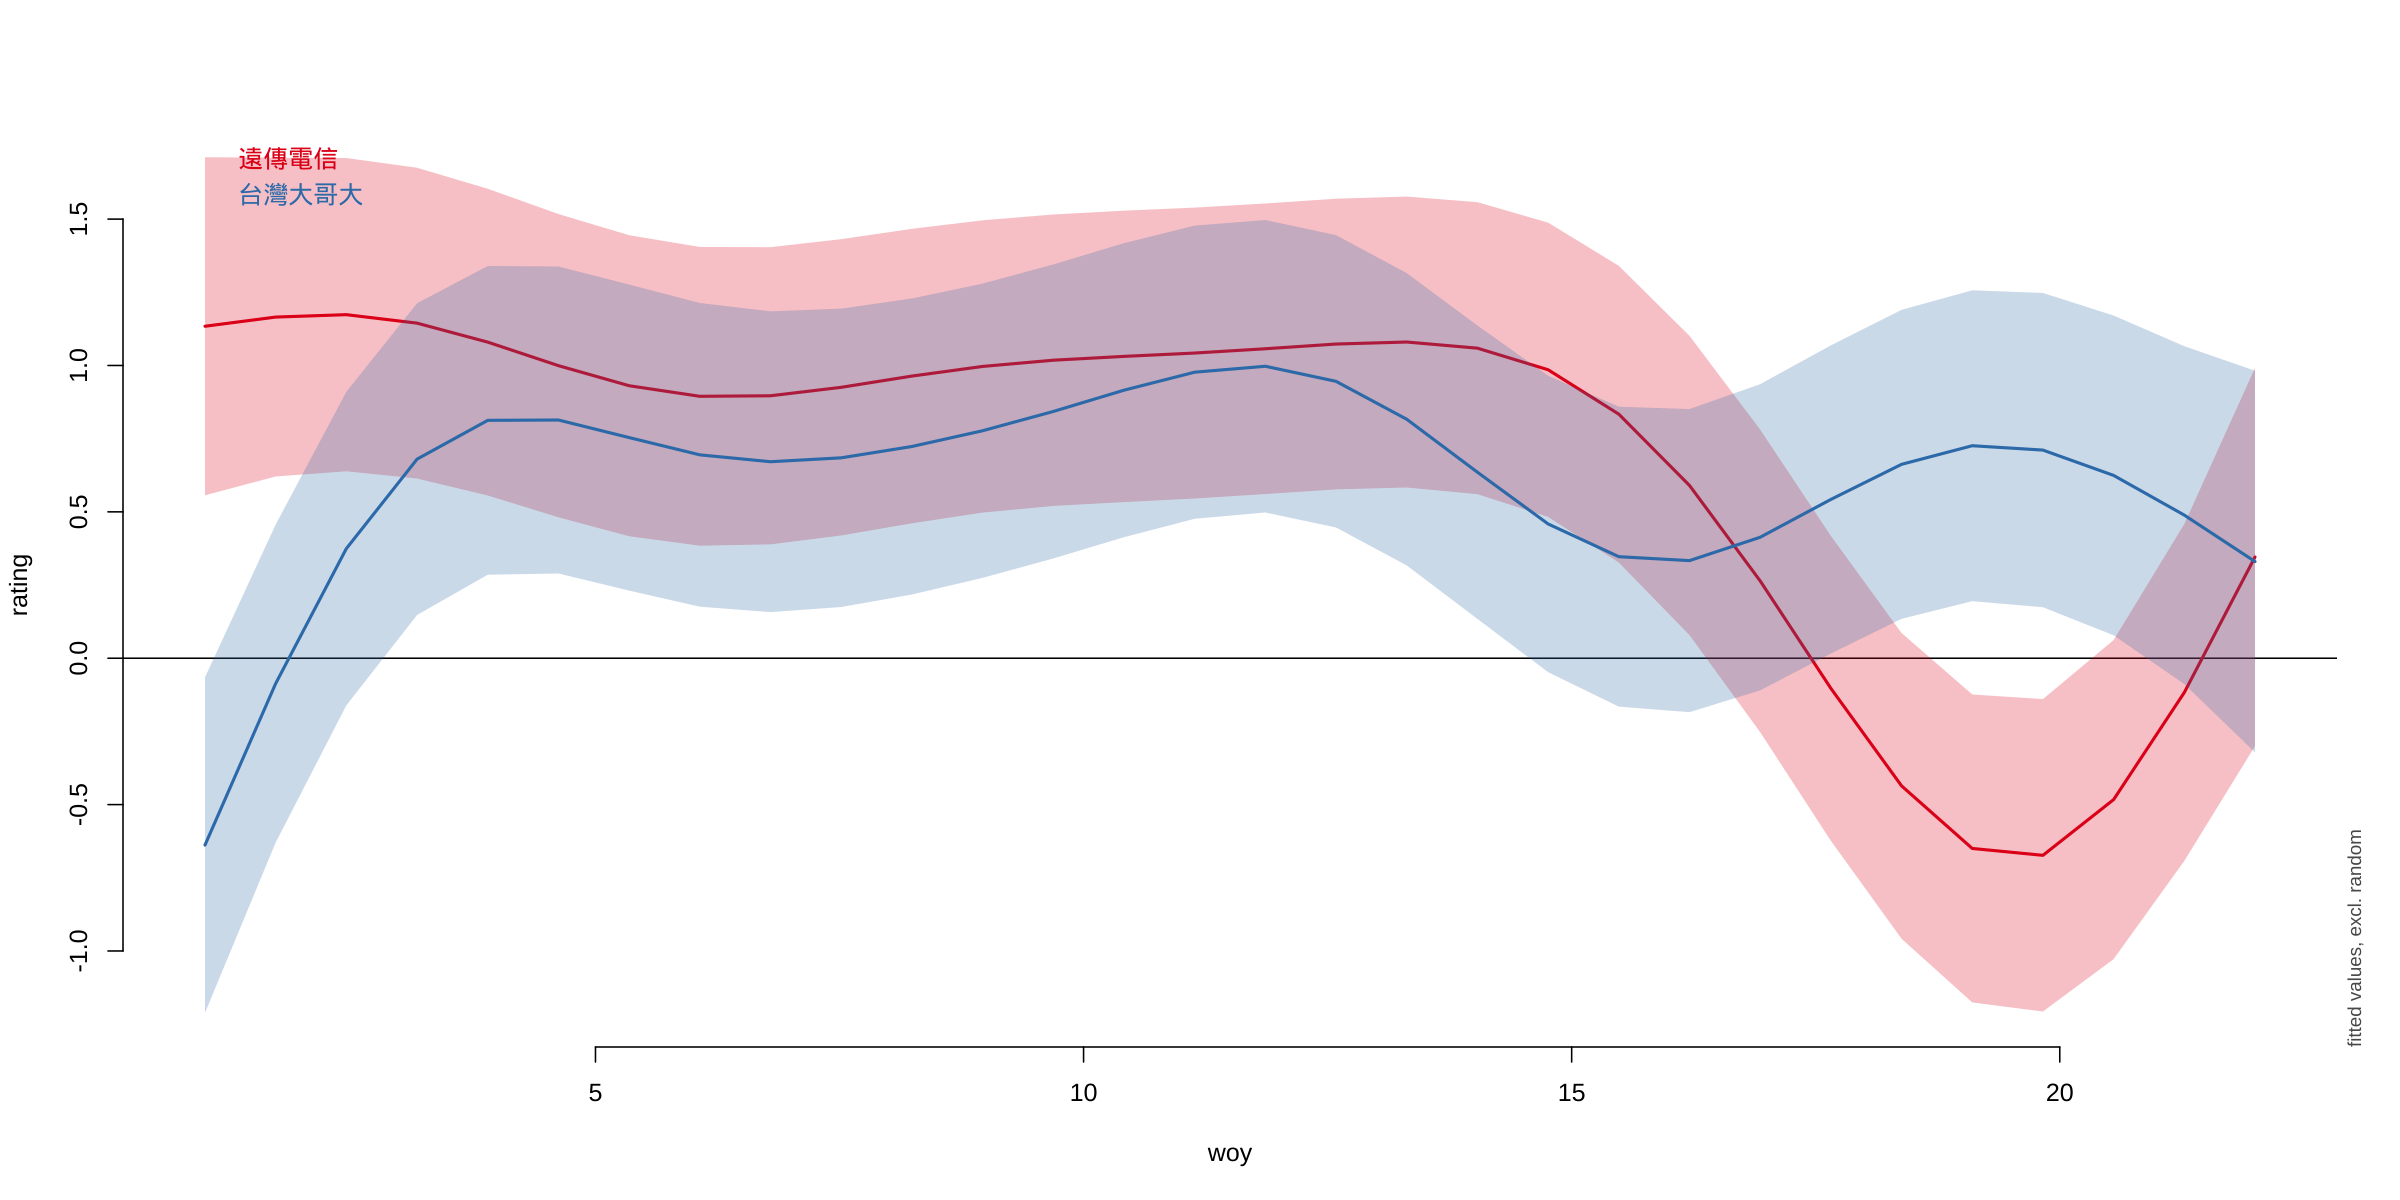

In [50]:
plot_smooth(m4, view="woy", plot_all="entity", cond=list(entity=c("遠傳電信", "台灣大哥大")), se=1,  
            col=brewer.pal(8, "Set1"), lwd=2, legend_plot_all="topleft")

Summary:
	* woy : numeric predictor; with 100 values ranging from 1.000000 to 22.000000. 
	* source : factor; set to the value(s): Ptt. (Might be canceled as random effect, check below.) 
	* NOTE : The following random effects columns are canceled: s(woy,source)
 

woy window(s) of significant difference(s):
	1.000000 - 3.333333
	13.727273 - 15.848485
	17.333333 - 21.151515


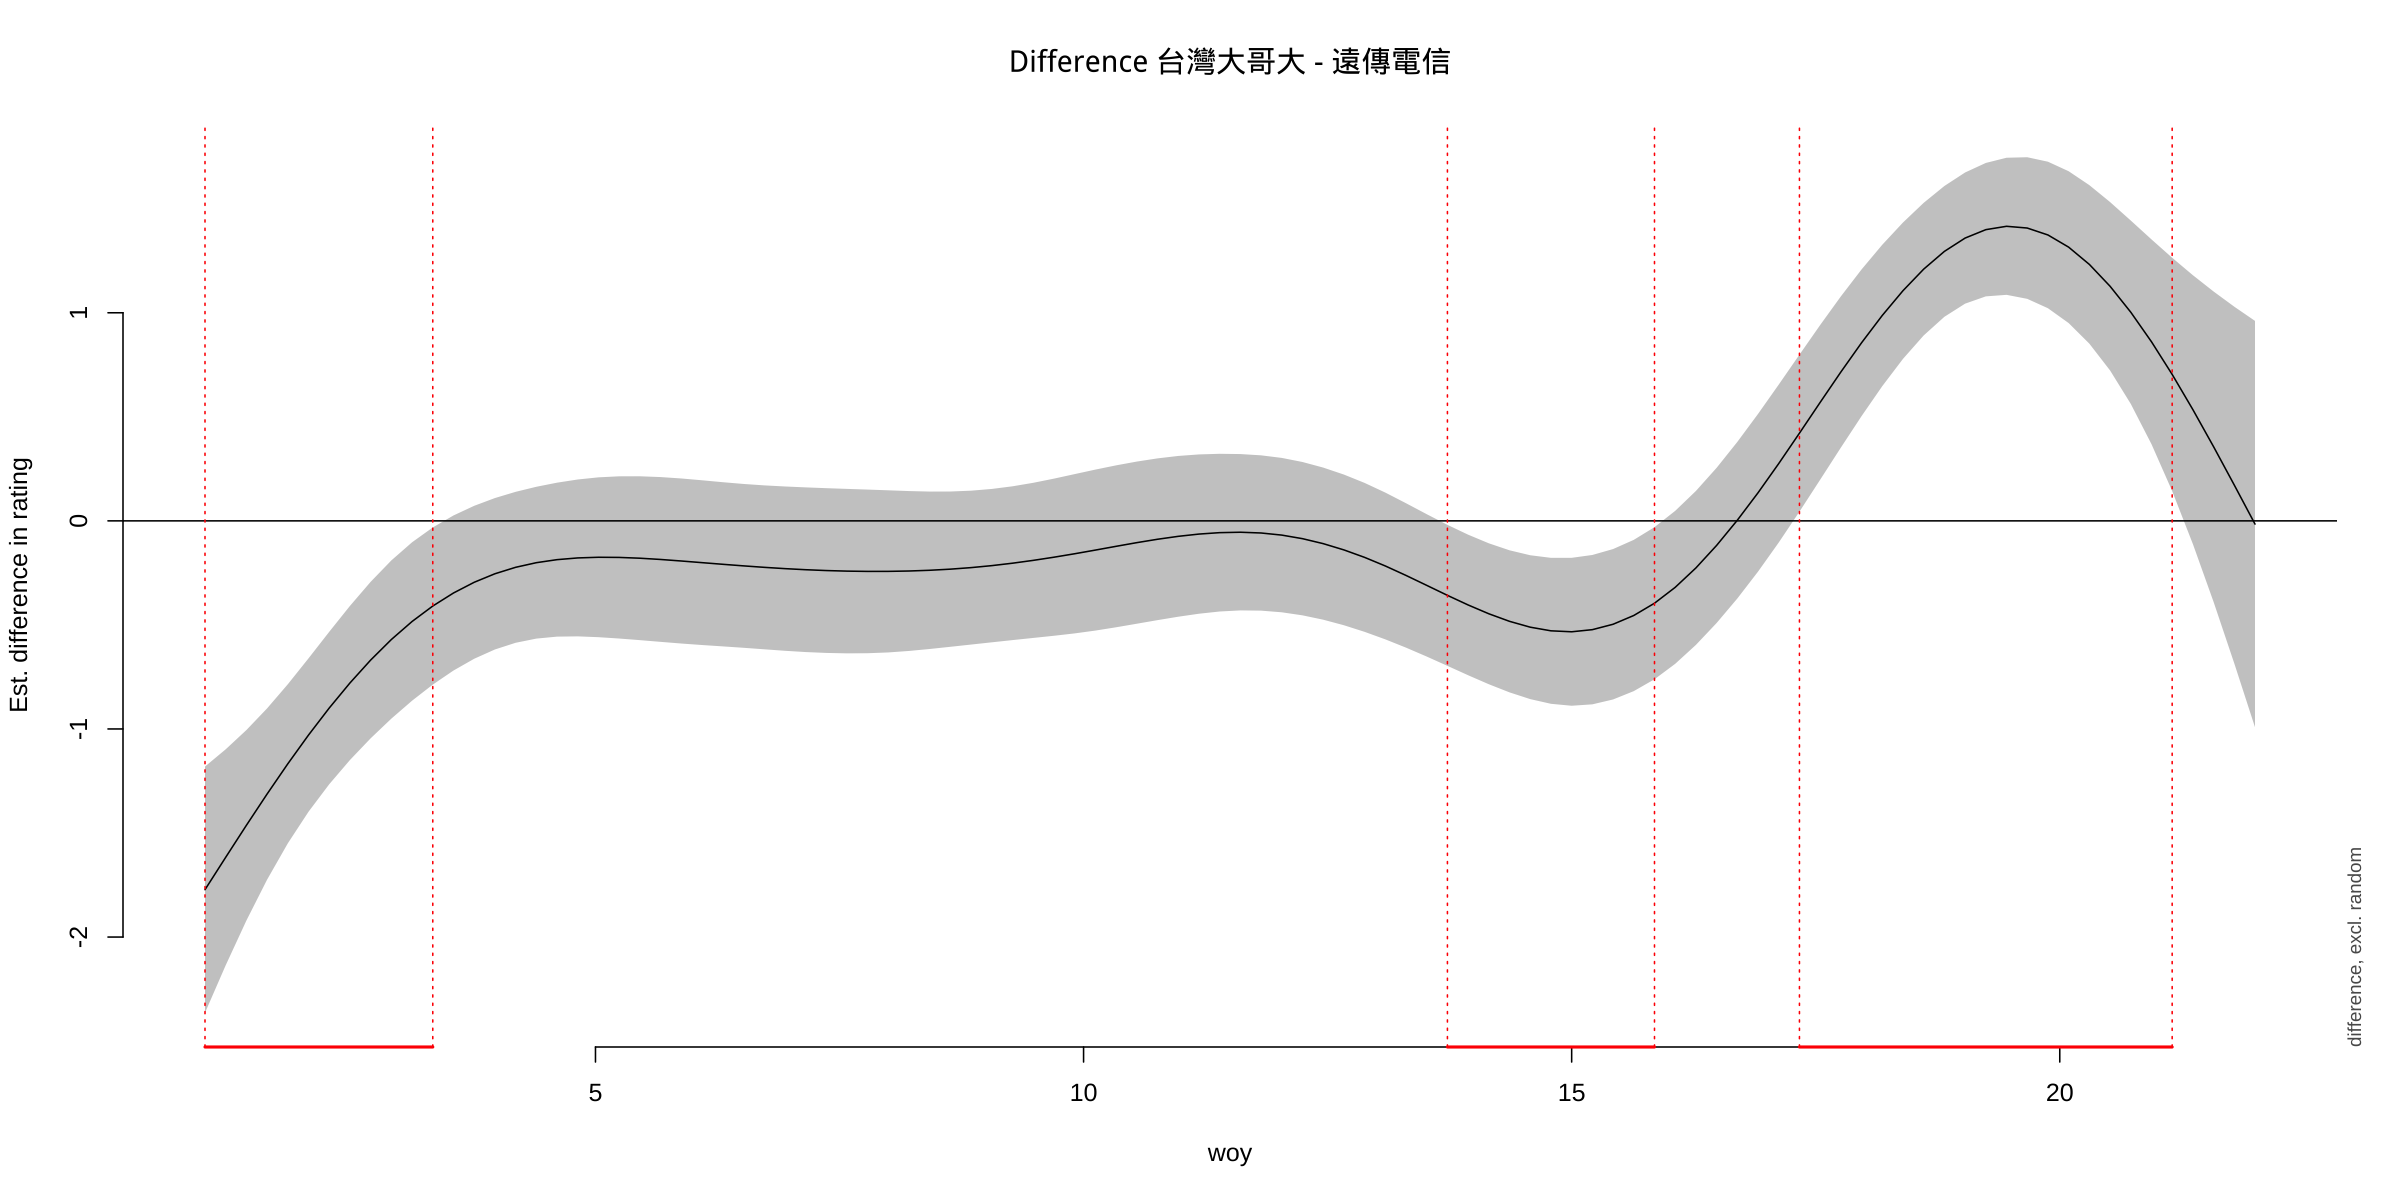

In [62]:
plot_diff(m4, view="woy", comp=list(entity=c("台灣大哥大", "遠傳電信")))

In [53]:
m3_data$entity_order = as.ordered(m3_data$entity)

In [54]:
levels(m3_data$entity_order)

[1] "遠傳電信"   "亞太電信"   "台灣之星"   "台灣大哥大" "無"

In [63]:
m5.x = bam(rating~s(woy)+s(woy, by=entity)+s(woy, source, bs="fs", m=1), 
         data = m3_data, family="binomial")

Warning message in gam.side(sm, X, tol = .Machine$double.eps^0.5):
“model has repeated 1-d smooths of same variable.”


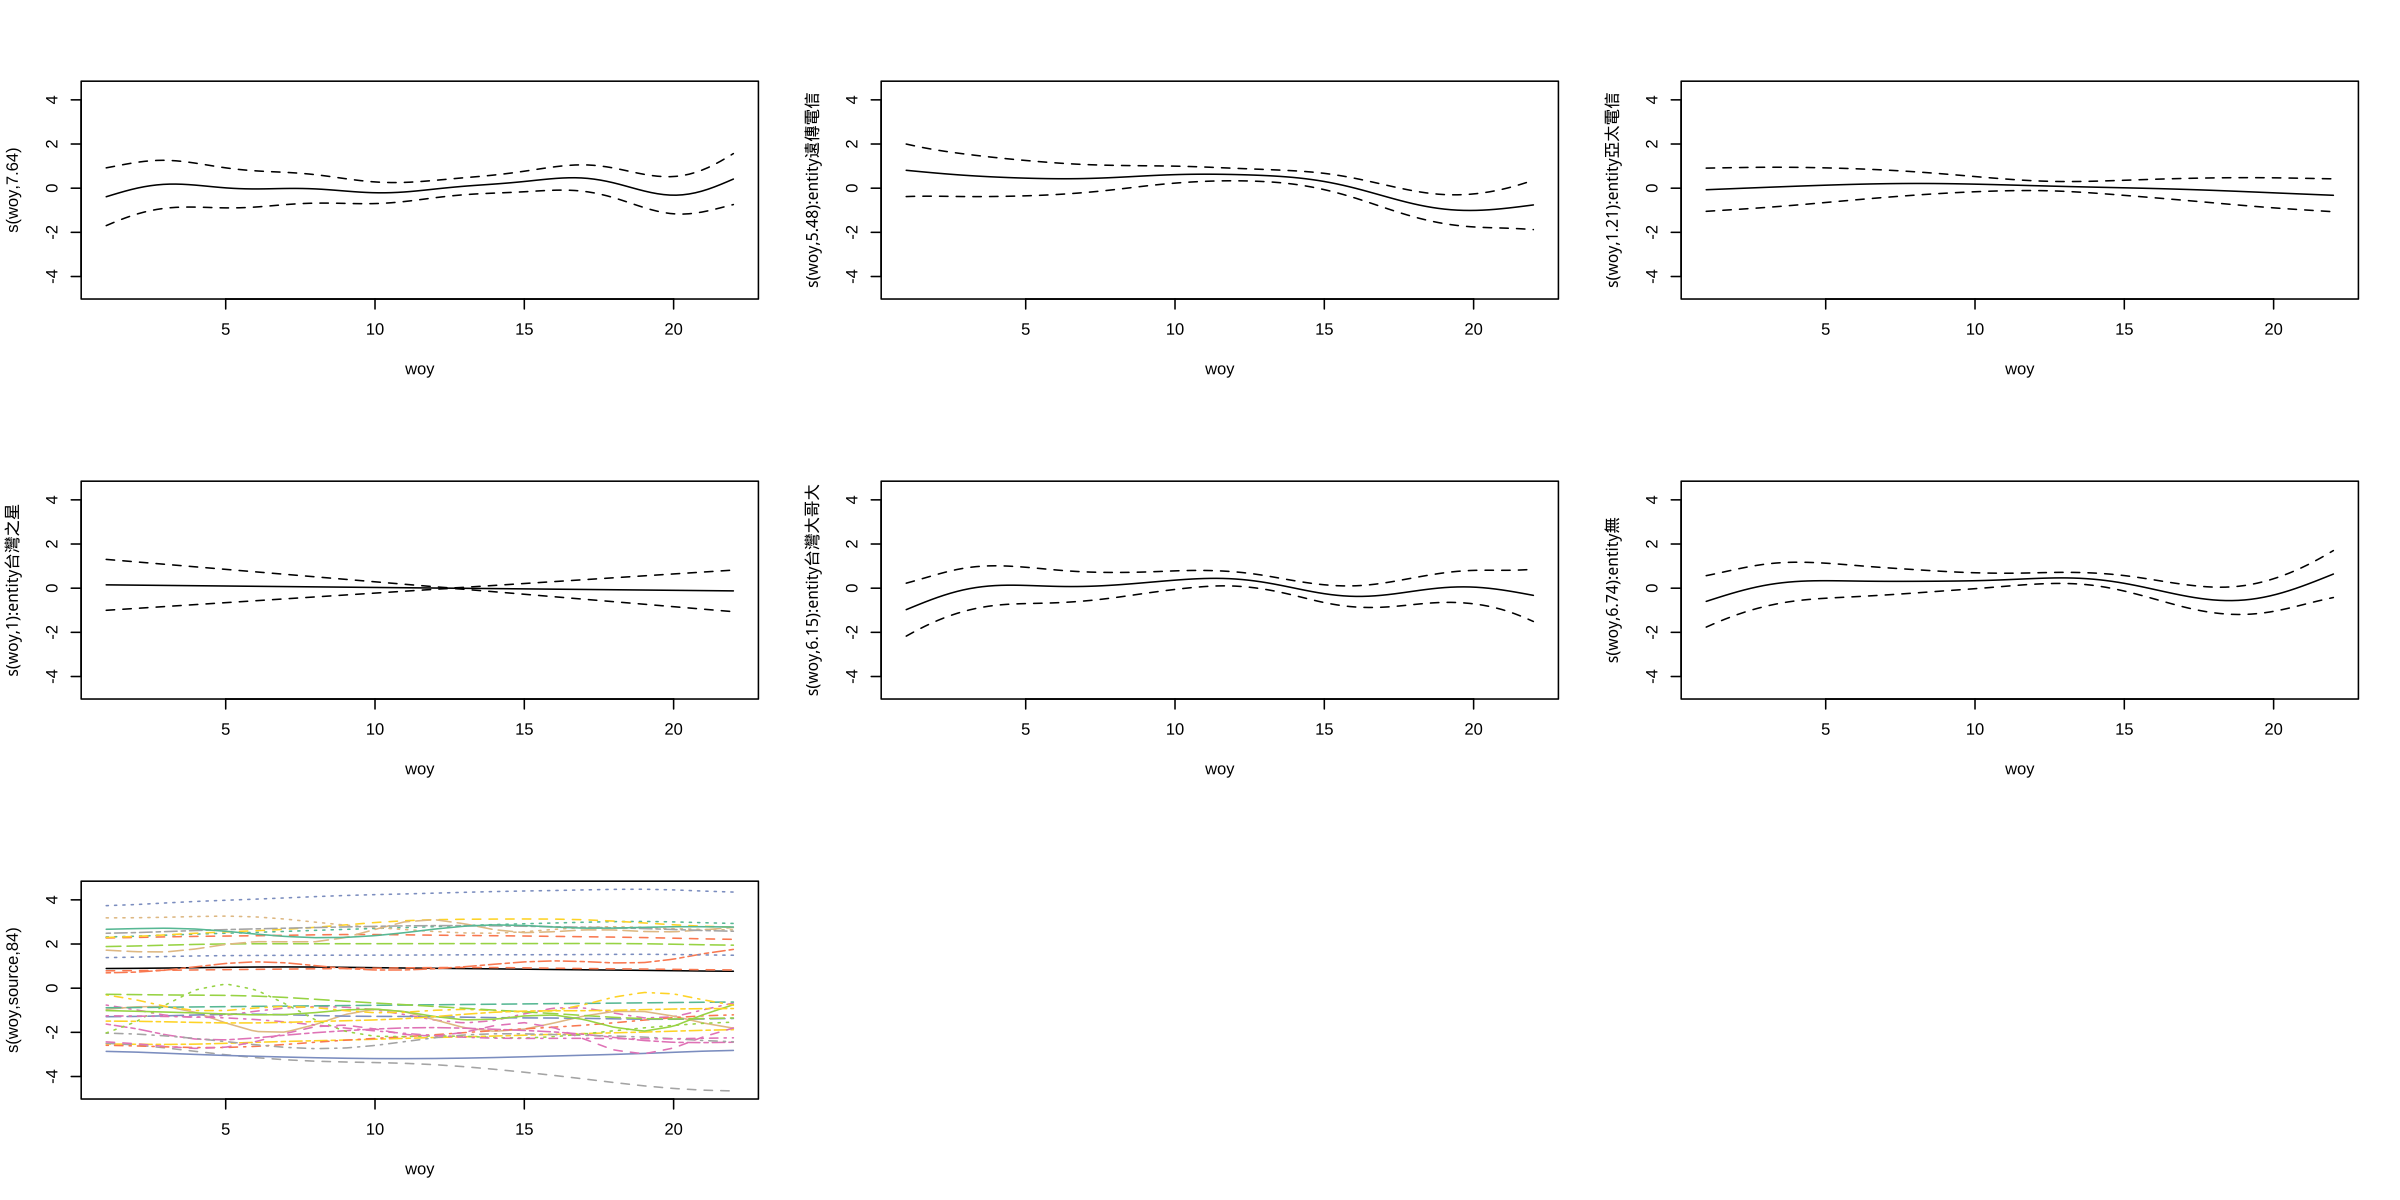

In [64]:
plot(m5.x, pages=1)

In [55]:
m5 = bam(rating~s(woy)+s(woy, by=entity_order)+s(woy, source, bs="fs", m=1), 
         data = m3_data, family="binomial")

Warning message in gam.side(sm, X, tol = .Machine$double.eps^0.5):
“model has repeated 1-d smooths of same variable.”


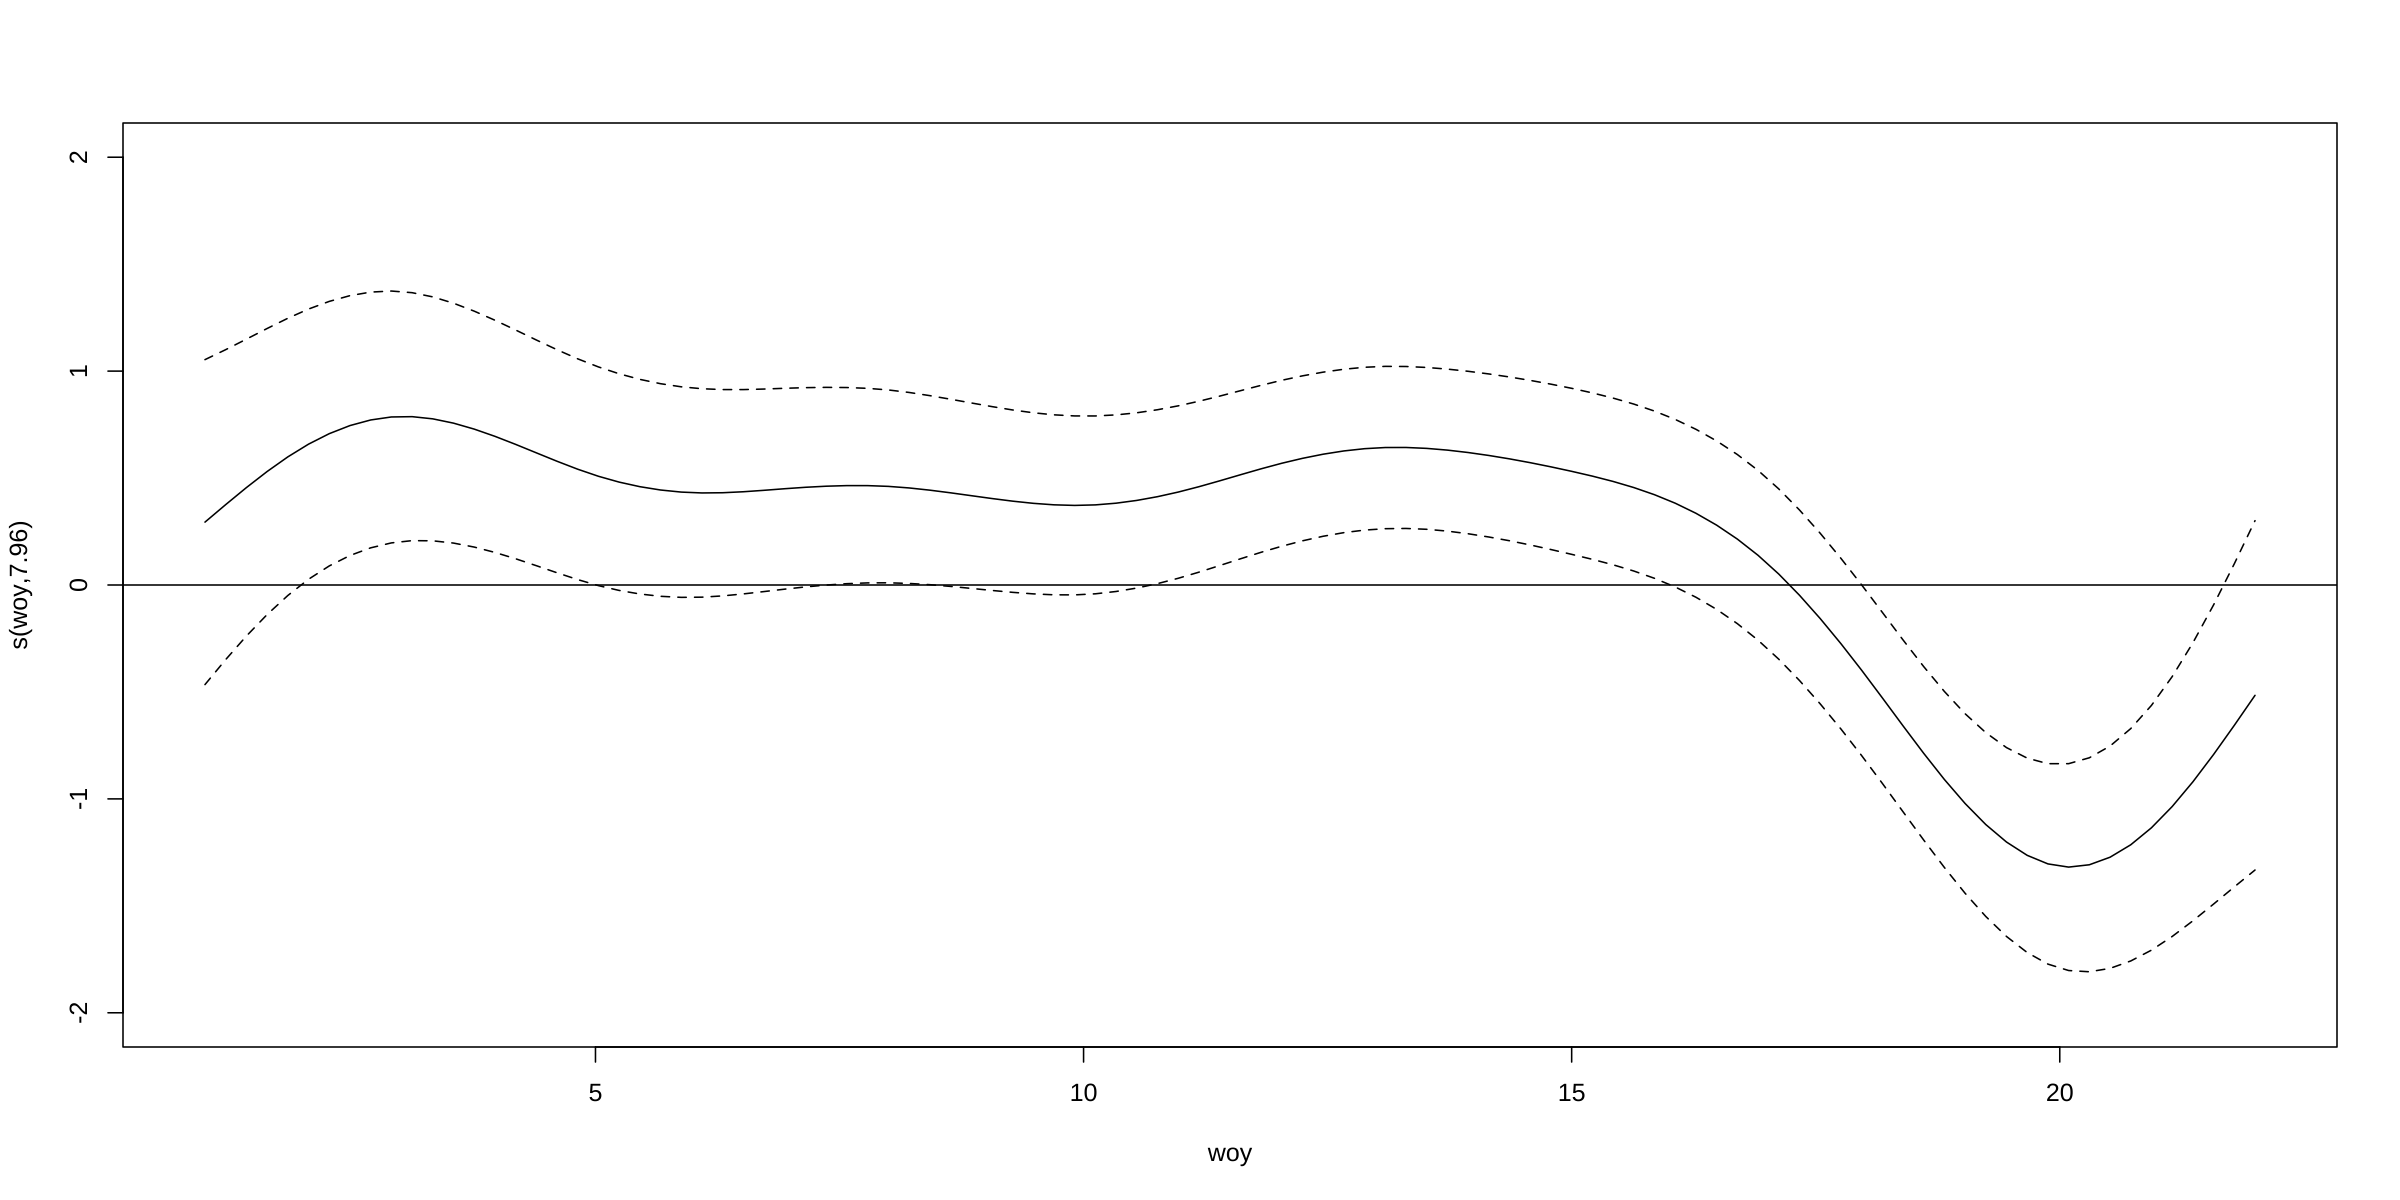

In [58]:
plot(m5, select=1, ylim=c(-2,2))
abline(h=0)

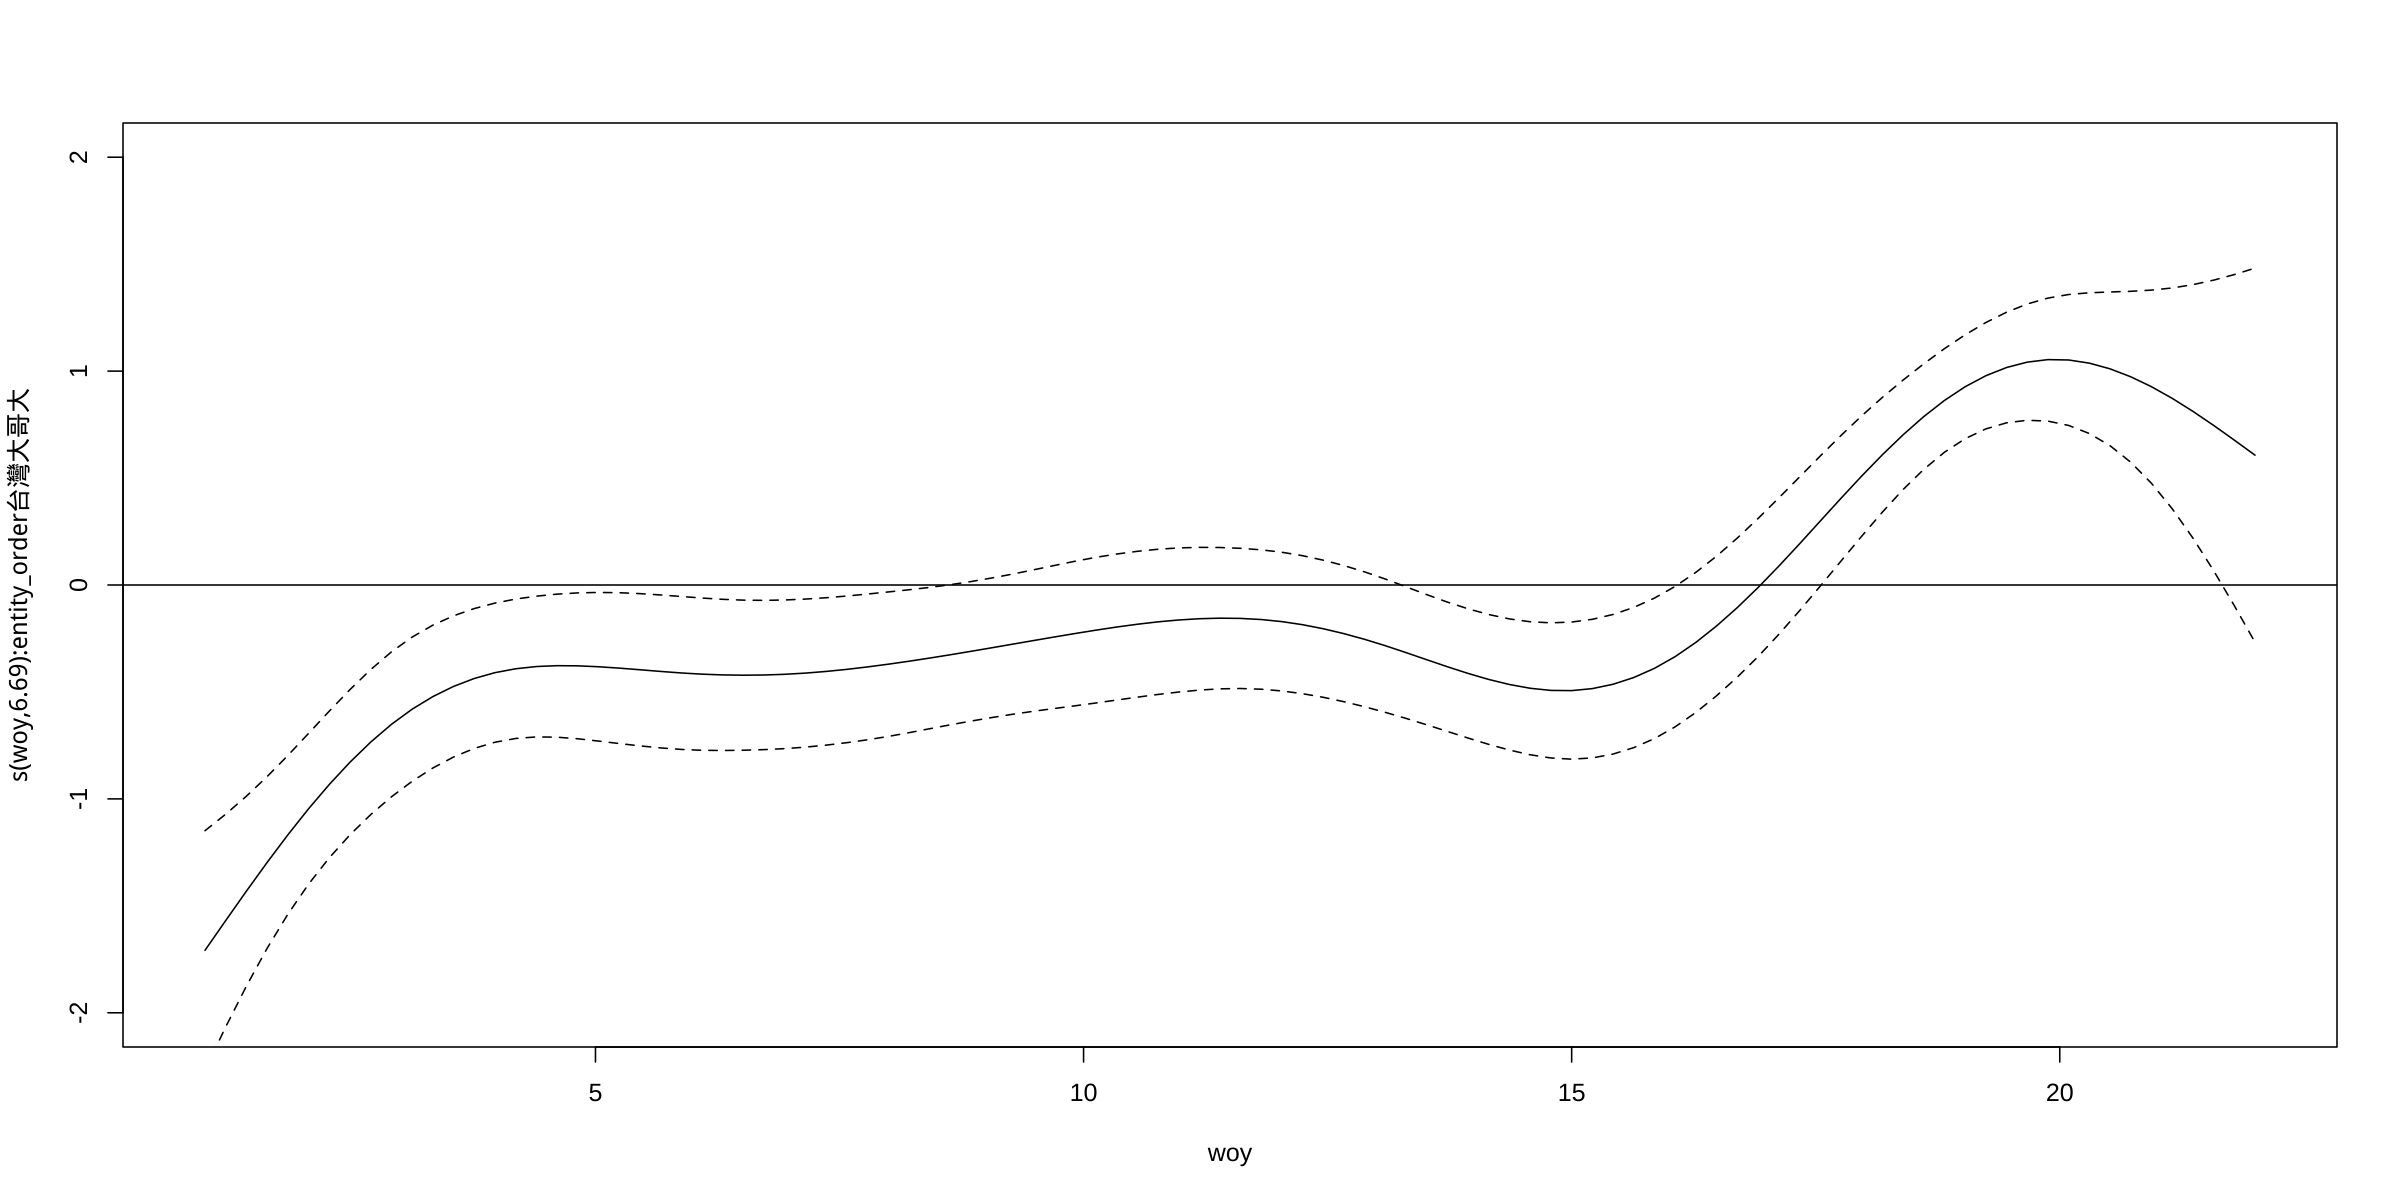

In [61]:
plot(m5, select=4, ylim=c(-2,2))
abline(h=0)

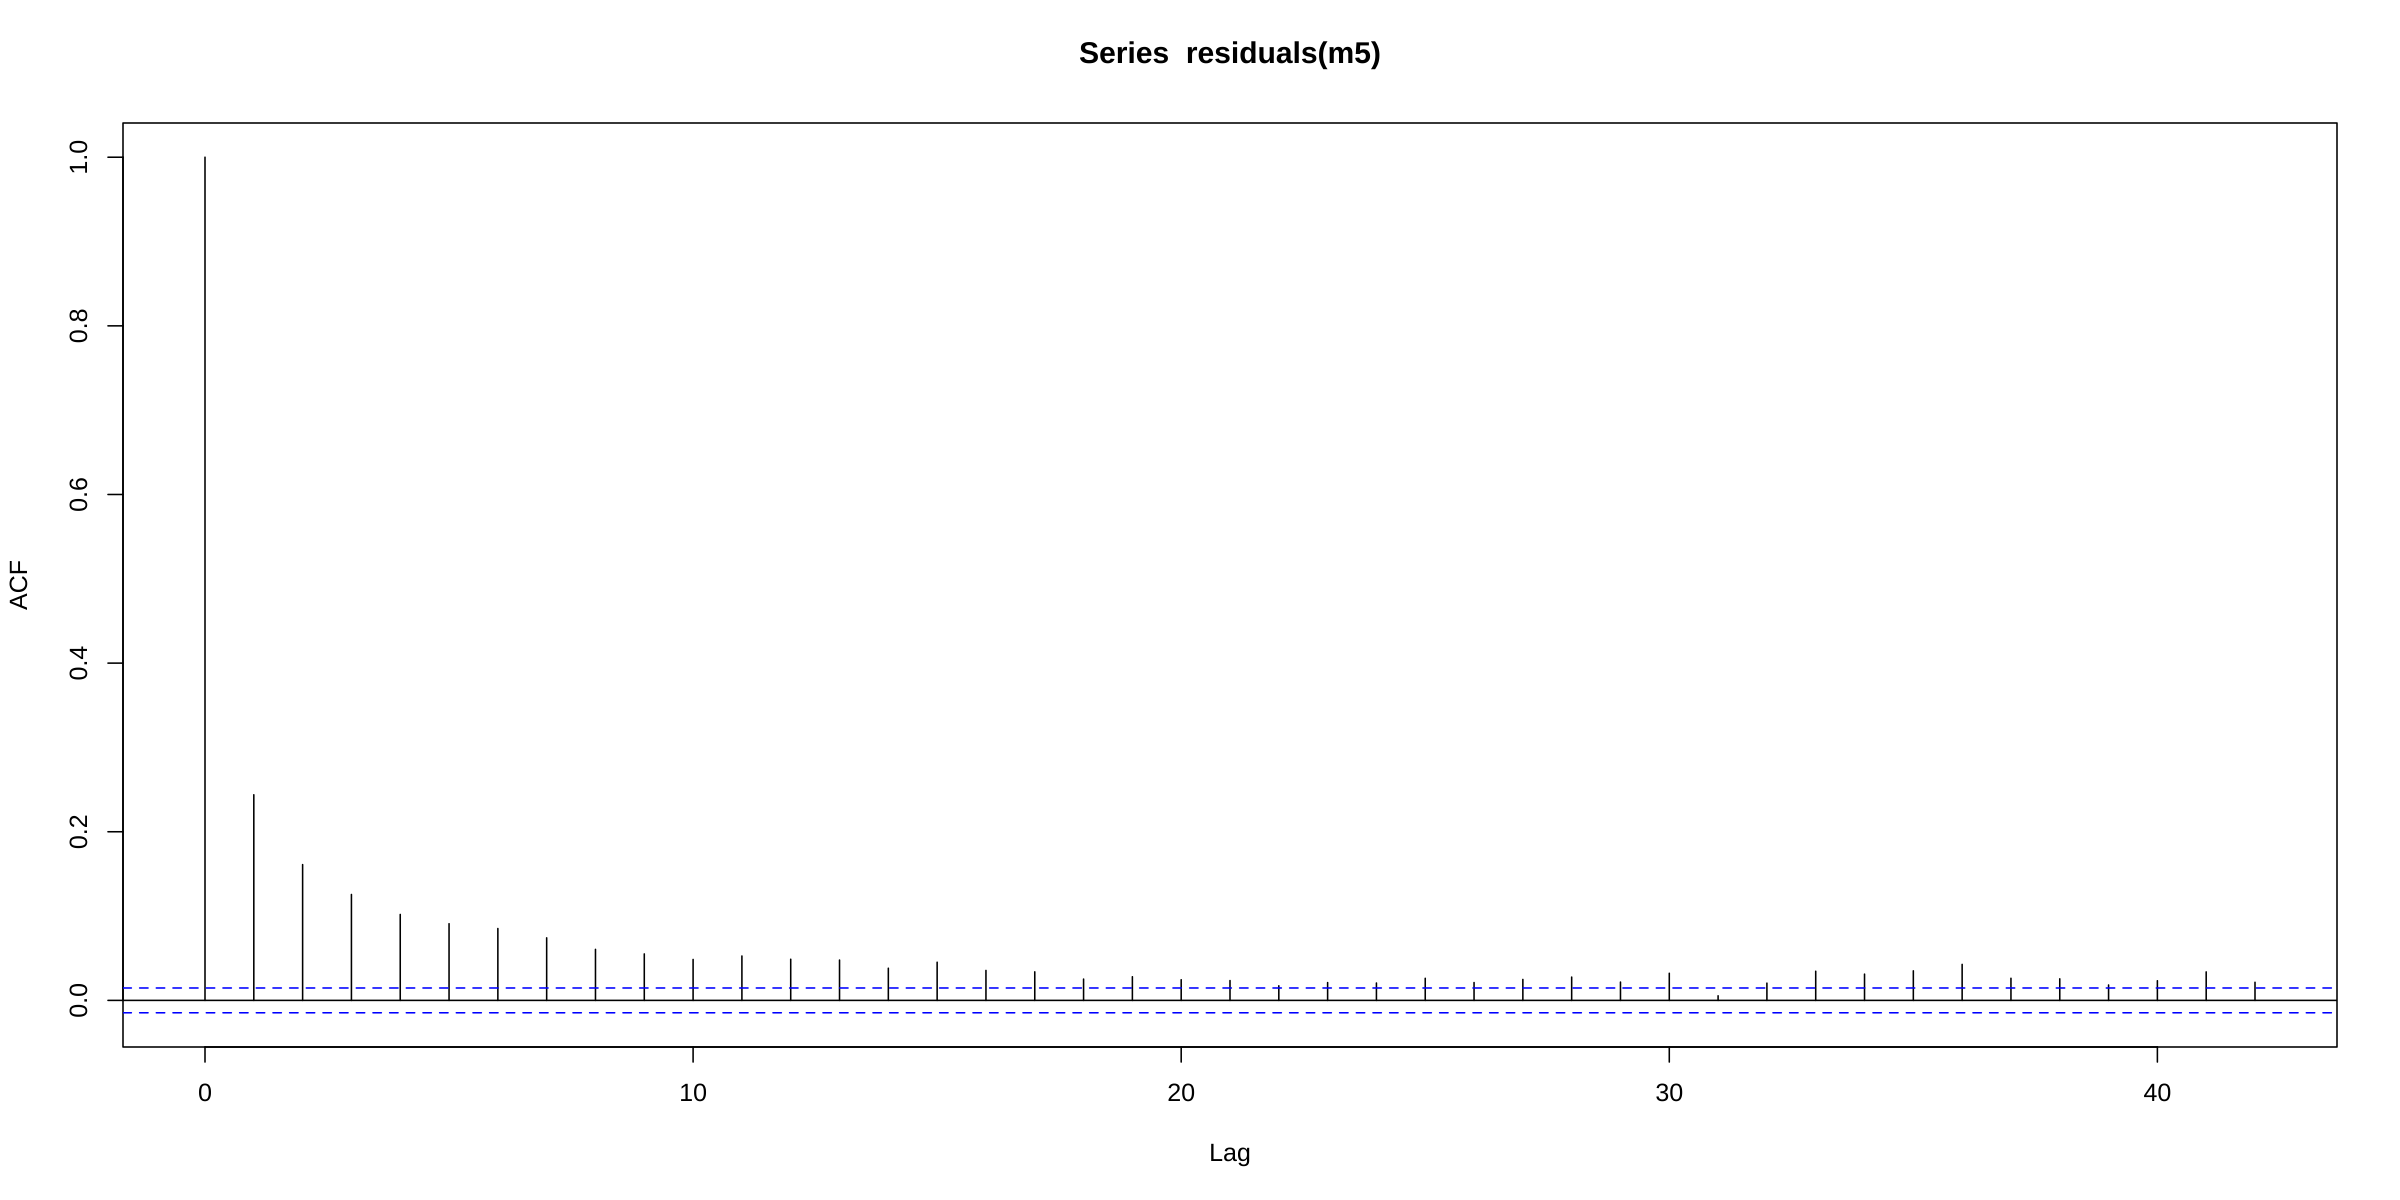

In [66]:
acf(residuals(m5))